# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Kurniawan Chandra Wijaya
- **Email:** kurniawanchandrawi@gmail.com
- **ID Dicoding:** MC008D5Y1552

## Menentukan Pertanyaan Bisnis

**Aspek Pengiriman**
1. Bagaimana waktu pengiriman rata-rata berdasarkan wilayah pelanggan?
2. Seberapa sering pesanan mengalami keterlambatan pengiriman?
3. Seberapa besar perbedaan antara rating ulasan pelanggan dan durasi pengiriman pesanan?
4. Apakah penjual tertentu memiliki tingkat keterlambatan lebih tinggi dibandingkan yang lain?
5. Bagaimana keterlambatan pengiriman memengaruhi rating ulasan pelanggan?
6. Bagaimana pola keterlambatan dalam hari-hari tertentu dalam seminggu?
7. Apakah pesanan dengan ongkos kirim lebih mahal memiliki keterlambatan lebih sedikit?

**Aspek Produk dan Penjualan**
1. Produk kategori apa yang memiliki penjualan tertinggi dan terendah dalam keseluruhan data?
2. Produk dengan harga berapa yang paling sering dibeli pelanggan?
3. Penjual mana yang memiliki jumlah pesanan tertinggi?
4. Bagaimana pola pembelian pelanggan berdasarkan waktu dalam sehari atau hari dalam seminggu?

**Aspek Pelanggan**
1. Bagaimaan tren kepuasan pelanggan berdasarkan ulasan dalam keseluruhan data?
2. Dari mana lokasi pelanggan yang paling banyak melakukan transaksi?
3. Seberapa sering pelanggan melakukan *repeat orders*?
4. Bagaimana tren pertumbuhan jumlah pelanggan baru terhadap pelanggan lama?

**Aspek Pembayaran**
1. Bagaimana pola pembayaran pelanggan dan metode pembayaran yang paling sering digunakan dalam keseluruhan data?
2. Apakah metode pembayaran tertentu berkorelasi dengan tingkat pembatalan pesanan?
3. Apakah ada perbedaan dalam waktu proses pembayaran antarmetode pembayaran?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium
from folium.plugins import HeatMap
import math
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from deep_translator import GoogleTranslator

## Data Wrangling

### Gathering Data

Impor data yang akan dianalisis. Data ini terletak dalam folder `data/` dan akan diimpor dengan nama sesuai nama berkas data `.csv`.

In [3]:
folder_path = 'data/'
datasets = {}

for file in os.listdir(folder_path):
    if file.endswith(".csv"): # Seleksi hanya file CSV
        file_path = os.path.join(folder_path, file)
        df_name = os.path.splitext(file)[0]
        datasets[df_name] = pd.read_csv(file_path)

print("File CSV yang berhasil diimpor:", list(datasets.keys()))

File CSV yang berhasil diimpor: ['customers_dataset', 'geolocation_dataset', 'orders_dataset', 'order_items_dataset', 'order_payments_dataset', 'order_reviews_dataset', 'products_dataset', 'product_category_name_translation', 'sellers_dataset']


Melihat sebagian dari data:

In [4]:
for name, df in datasets.items():
    print(f"Dataset: {name}")
    display(df.head())
    df.info()
    print("\n=====================================")

Dataset: customers_dataset


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Dataset: geolocation_dataset


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

Dataset: orders_dataset


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Dataset: order_items_dataset


order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Dataset: order_payments_dataset


order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

Dataset: order_reviews_dataset


review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

Dataset: products_dataset


product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

Dataset: product_category_name_translation


product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

Dataset: sellers_dataset


seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB



In [5]:
for name, df in datasets.items():
    print(f"Dataset: {name}")
    display(df.duplicated().sum())

Dataset: customers_dataset


0

Dataset: geolocation_dataset


261831

Dataset: orders_dataset


0

Dataset: order_items_dataset


0

Dataset: order_payments_dataset


0

Dataset: order_reviews_dataset


0

Dataset: products_dataset


0

Dataset: product_category_name_translation


0

Dataset: sellers_dataset


0

In [6]:
datasets['geolocation_dataset'].drop_duplicates(inplace=True)

#### Merge Data berdasarkan ERD Database

Mengecek kondisi lokasi geografis pada data.

In [7]:
datasets['geolocation_dataset']['geolocation_zip_code_prefix'].duplicated().sum()

719317

Setiap *zip code* memiliki koordinat yang berbeda-beda sehingga kolom `zip_code_prefix` tidak bisa mendefinisikan lokasi secara unik per pelanggan. Adanya duplikasi pada data ini juga mendukung pernyataan tersebut.

Untuk mempermudah analisis, data lokasi geografis akan dioptimasi dengan pengelompokan dan agregasi menggunakan rata-rata pada koordinat.

In [8]:
geo_agg = datasets['geolocation_dataset'].groupby('geolocation_zip_code_prefix', as_index=False).agg(
    geolocation_lat=('geolocation_lat', 'mean'),
    geolocation_lng=('geolocation_lng', 'mean')
)

In [9]:
customer = datasets['customers_dataset'].merge(geo_agg, left_on='customer_zip_code_prefix',
                                               right_on='geolocation_zip_code_prefix', how='left')
seller = datasets['sellers_dataset'].merge(geo_agg, left_on='seller_zip_code_prefix',
                                             right_on='geolocation_zip_code_prefix', how='left')

In [10]:
customer.drop(columns=['customer_zip_code_prefix', 'geolocation_zip_code_prefix'], inplace=True)
seller.drop(columns=['seller_zip_code_prefix', 'geolocation_zip_code_prefix'], inplace=True)

customer.rename(columns={'geolocation_lat': 'customer_lat', 'geolocation_lng': 'customer_lng'}, inplace=True)
seller.rename(columns={'geolocation_lat': 'seller_lat', 'geolocation_lng': 'seller_lng'}, inplace=True)

In [11]:
order_items = datasets['order_items_dataset'].merge(seller, on='seller_id', how='left')
order_items = order_items.merge(datasets['products_dataset'], on='product_id', how='left')

In [12]:
order = datasets['orders_dataset'].merge(customer, on='customer_id', how='left')
order = order.merge(order_items, on='order_id', how='left')
order = order.merge(datasets['order_payments_dataset'], on='order_id', how='left')
order = order.merge(datasets['order_reviews_dataset'], on='order_id', how='left')

In [13]:
display(order.head())

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date                customer_unique_id  \
0           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
2           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
3           2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
4           2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   

  customer_city  ... payment_sequential  payment_type  payment_installments  \
0     sao paulo  ...                1.0   credit_card                   1.0   
1     sao paulo  ...                3.0       voucher                   1.0   
2     sao paulo  ...                2.0       voucher                   1.0   
3     barreiras  ...                1.0        boleto                   1.0   
4    vianopolis  ...                1.0   credit_card                   3.0   

   payment_value                         review_id review_score  \
0          18.12  a54f0611adc9ed256b57ede6b6eb5114          4.0   
1           2.00  a54f0611adc9ed256b57ede6b6eb5114          4.0   
2          18.59  a54f0611adc9ed256b57ede6b6eb5114          4.0   
3         141.46  8d5266042046a06655c8db133d120ba5          4.0   
4         179.12  e73b67b67587f7644d5bd1a52deb1b01          5.0   

  review_comment_title                             review_comment_message  \
0                  NaN  Não testei o produto ainda, mas ele veio corre...   
1                  NaN  Não testei o produto ainda, mas ele veio corre...   
2                  NaN  Não testei o produto ainda, mas ele veio corre...   
3     Muito boa a loja                               Muito bom o produto.   
4                  NaN                                                NaN   

   review_creation_date review_answer_timestamp  
0   2017-10-11 00:00:00     2017-10-12 03:43:48  
1   2017-10-11 00:00:00     2017-10-12 03:43:48  
2   2017-10-11 00:00:00     2017-10-12 03:43:48  
3   2018-08-08 00:00:00     2018-08-08 18:37:50  
4   2018-08-18 00:00:00     2018-08-22 19:07:58  

[5 rows x 41 columns]

In [14]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   customer_unique_id             119143 non-null  object 
 9   customer_city                  119143 non-null  object 
 10  customer_state                 119143 non-null  object 
 11  customer_lat                   118821 non-null  float64
 12  customer_lng                  

**Insight:**
- Dataset yang digunakan berisi informasi yang cukup komprehensif tentang *E-Commerce*. Dataset yang diimpor mencakup berbagai aspek bisnis, termasuk pelanggan, pesanan, pembayaran, ulasan, produk, kategori, penjualan, dan lokasi geografis.
- Dataset sudah terpisah berdasarkan entitas-entitas utama, yaitu pelanggan, produk, pesanan, dan penjualan. Setiap entitias tersimpan dalam tabel yang berbeda, mengindikasikan adanya unsur relasional pada data. Akibatnya,diperlukan *join* atau *merge* beberapa dataset untuk analisis yang lebih *straight-forward*.
- Setiap observasi geolokasi tidak unik untuk setiap pelanggan berdasarkan zip_code. Hal ini mengindikasikan bahwa walaupun *database* sudah dapat menangkap titik lokasi pelanggan dan penjual, *database* belum dapat diimplementasikan secara langsung pada setiap pemesanan. 

### Assessing Data

#### Identifikasi *Missing Value*

Pengecekan *missing value:*

In [15]:
order.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0
customer_city                         0
customer_state                        0
customer_lat                        322
customer_lng                        322
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
seller_city                         833
seller_state                        833
seller_lat                         1098
seller_lng                         1098
product_category_name              2542
product_name_lenght                2542


In [16]:
# Tampilkan semua unique_value pada setiap kolom kategorikal, kecuali kolom 'order_id', 'customer_id', 'seller_id', 'product_id', 'order_item_id', 'payment_sequential', 'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'
cat_cols = [col for col in order.columns if order[col].dtype == 'object' and col not in ['order_id', 'customer_id', 'seller_id', 'product_id', 'order_item_id', 'customer_unique_id', 'review_creation_day']]
for col in cat_cols:
    print(f"Unique Values of {col}: {order[col].unique()}")


Unique Values of order_status: ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']
Unique Values of order_purchase_timestamp: ['2017-10-02 10:56:33' '2018-07-24 20:41:37' '2018-08-08 08:38:49' ...
 '2017-08-27 14:46:43' '2018-01-08 21:28:27' '2018-03-08 20:57:30']
Unique Values of order_approved_at: ['2017-10-02 11:07:15' '2018-07-26 03:24:27' '2018-08-08 08:55:23' ...
 '2017-08-27 15:04:16' '2018-01-08 21:36:21' '2018-03-09 11:20:28']
Unique Values of order_delivered_carrier_date: ['2017-10-04 19:55:00' '2018-07-26 14:31:00' '2018-08-08 13:50:00' ...
 '2017-08-28 20:52:26' '2018-01-12 15:35:03' '2018-03-09 22:11:59']
Unique Values of order_delivered_customer_date: ['2017-10-10 21:25:13' '2018-08-07 15:27:45' '2018-08-17 18:06:29' ...
 '2017-09-21 11:24:17' '2018-01-25 23:32:54' '2018-03-16 13:08:30']
Unique Values of order_estimated_delivery_date: ['2017-10-18 00:00:00' '2018-08-13 00:00:00' '2018-09-04 00:00:00'
 '2017-12-15 00:00:00' '2018-

In [17]:
# Ubah status 'unavailable' menjadi NaN
order["order_status"] = order["order_status"].replace("unavailable", np.nan)
order['payment_type'] = order['payment_type'].replace("not_defined", np.nan)

In [18]:
corrections = {
    "sao  paulo": "sao paulo",
    "sao paulo - sp": "sao paulo",
    "sao paulo sp": "sao paulo",
    "sao paulo / sao paulo": "sao paulo",
    "sao paulo, sp": "sao paulo",
    "s paulo": "sao paulo",
    "são paulo": "sao paulo",
    "robeirao preto": "ribeirao preto",
    "ribeirao pretp": "ribeirao preto",
    "garulhos": "guarulhos",
    "sao bernardo do capo": "sao bernardo do campo",
    "sbc": "sao bernardo do campo",
    "ao bernardo do campo": "sao bernardo do campo",
    "juzeiro do norte": "juazeiro do norte",
    "floranopolis": "florianopolis",
    "balenario camboriu": "balneario camboriu",
    "brasilia df": "brasilia",
    "rio de janeiro \\rio de janeiro": "rio de janeiro",
    "rio de janeiro, rio de janeiro, brasil": "rio de janeiro"
}


order["seller_city"] = order["seller_city"].replace(corrections)

invalid_cities = [
    "vendas@creditparts.com.br",
    "04482255",
    "centro",
    "minas gerais",
    "bahia"
]

order["seller_city"] = order["seller_city"].replace(invalid_cities, np.nan)

#### Identifikasi *Inconsistency*

In [19]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   118491 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   customer_unique_id             119143 non-null  object 
 9   customer_city                  119143 non-null  object 
 10  customer_state                 119143 non-null  object 
 11  customer_lat                   118821 non-null  float64
 12  customer_lng                  

In [20]:
# Ambil kolom yang namanya mengandung 'date'
date_cols = [col for col in order.columns if 'date' in col]
order[date_cols].head()

date_cols.extend(['order_purchase_timestamp', 'order_approved_at', 'review_answer_timestamp'])

In [21]:
for col in date_cols:
    order[col] = pd.to_datetime(order[col], errors='coerce')

In [22]:
order[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 1   order_delivered_customer_date  115722 non-null  datetime64[ns]
 2   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 3   shipping_limit_date            118310 non-null  datetime64[ns]
 4   review_creation_date           118146 non-null  datetime64[ns]
 5   order_purchase_timestamp       119143 non-null  datetime64[ns]
 6   order_approved_at              118966 non-null  datetime64[ns]
 7   review_answer_timestamp        118146 non-null  datetime64[ns]
dtypes: datetime64[ns](8)
memory usage: 7.3 MB


#### Identifikasi *Outlier*

In [23]:
# Cek ringkasan statistik data
order.describe()

order_purchase_timestamp              order_approved_at  \
count                         119143                         118966   
mean   2017-12-29 18:36:13.115760128  2017-12-30 04:49:18.425726976   
min              2016-09-04 21:15:19            2016-09-15 12:16:38   
25%              2017-09-10 20:15:46     2017-09-11 15:50:48.500000   
50%              2018-01-17 11:59:12            2018-01-17 16:49:49   
75%              2018-05-03 13:18:30            2018-05-03 16:56:53   
max              2018-10-17 17:30:18            2018-09-03 17:40:06   
std                              NaN                            NaN   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                         117057                         115722   
mean   2018-01-03 08:24:34.395524864     2018-01-12 20:55:38.199616   
min              2016-10-08 10:34:01            2016-10-11 13:46:32   
25%              2017-09-14 19:52:12  2017-09-22 21:54:31.249999872   
50%              2018-01-23 17:03:08            2018-02-01 03:17:55   
75%              2018-05-07 14:57:00     2018-05-15 00:08:31.500000   
max              2018-09-11 19:48:28            2018-10-17 13:22:46   
std                              NaN                            NaN   

       order_estimated_delivery_date   customer_lat   customer_lng  \
count                         119143  118821.000000  118821.000000   
mean   2018-01-22 15:21:10.241642240     -21.229855     -46.191269   
min              2016-09-30 00:00:00     -33.689890     -72.668821   
25%              2017-10-02 00:00:00     -23.589697     -48.097847   
50%              2018-02-14 00:00:00     -22.927958     -46.631157   
75%              2018-05-25 00:00:00     -20.180708     -43.605764   
max              2018-11-12 00:00:00      42.184003      -8.723762   
std                              NaN       5.564564       4.043391   

       order_item_id            shipping_limit_date          price  ...  \
count  118310.000000                         118310  118310.000000  ...   
mean        1.196543  2018-01-05 22:06:13.308807424     120.646603  ...   
min         1.000000            2016-09-19 00:15:34       0.850000  ...   
25%         1.000000            2017-09-18 14:30:33      39.900000  ...   
50%         1.000000     2018-01-25 04:11:15.500000      74.900000  ...   
75%         1.000000  2018-05-10 02:51:40.249999872     134.900000  ...   
max        21.000000            2020-04-09 22:35:08    6735.000000  ...   
std         0.699489                            NaN     184.109691  ...   

       product_weight_g  product_length_cm  product_height_cm  \
count     118290.000000      118290.000000      118290.000000   
mean        2112.250740          30.265145          16.619706   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1800.000000          38.000000          20.000000   
max        40425.000000         105.000000         105.000000   
std         3786.695111          16.189367          13.453584   

       product_width_cm  payment_sequential  payment_installments  \
count     118290.000000       119140.000000         119140.000000   
mean          23.074799            1.094737              2.941246   
min            6.000000            1.000000              0.000000   
25%           15.000000            1.000000              1.000000   
50%           20.000000            1.000000              2.000000   
75%           30.000000            1.000000              4.000000   
max          118.000000           29.000000             24.000000   
std           11.749139            0.730141              2.777848   

       payment_value   review_score           review_creation_date  \
count  119140.000000  118146.000000                         118146   
mean      172.735135       4.015582  2018-01-11 13:17:50.103092992   
min    

**Insight:**
- Banyak pesanan yang tidak memiliki tanggal pengiriman, beberapa pelanggan dan penjual tidak memiliki data geolokasi, informasi produk dan kategori banyak yang hilang, sebagian transaksi tidak memiliki data pembayaran, serta mayoritas pelanggan memberikan rating tanpa ulasan tertulis, yang semuanya dapat mempengaruhi analisis logistik, preferensi pelanggan, dan performa produk.
- Beberapa pesanan memiliki tanggal pengiriman yang sangat awal (2016) dibandingkan mayoritas yang berada pada tahun 2017-2018, terdapat produk dengan berat nol, dan freight value serta payment value memiliki outlier yang sangat besar (maksimum jauh dari Q3), yang mengindikasikan adanya kemungkinan kesalahan *input* atau variasi transaksi yang ekstrem.

### Cleaning Data

Terdapat beberapa *missing value* pada data. Untuk menentukan metode imputasi, akan dicek terlebih dahulu persentase *missing value* pada setiap kolom.

In [24]:
order.isna().mean().round(4) * 100

order_id                          0.00
customer_id                       0.00
order_status                      0.55
order_purchase_timestamp          0.00
order_approved_at                 0.15
order_delivered_carrier_date      1.75
order_delivered_customer_date     2.87
order_estimated_delivery_date     0.00
customer_unique_id                0.00
customer_city                     0.00
customer_state                    0.00
customer_lat                      0.27
customer_lng                      0.27
order_item_id                     0.70
product_id                        0.70
seller_id                         0.70
shipping_limit_date               0.70
price                             0.70
freight_value                     0.70
seller_city                       0.75
seller_state                      0.70
seller_lat                        0.92
seller_lng                        0.92
product_category_name             2.13
product_name_lenght               2.13
product_description_lengh

Sebagian besar kolom memiliki *missing value* < 5%. Oleh karena itu, akan dilakukan imputasi sederhana menggunakan *mean*/median atau modus. Data *review* memiliki *missing value* yang cukup tinggi, tetapi adanya *missing value* ini masuk akal karena tidak semua pembeli memberikan *review* sehingga akan dibiarkan.

In [25]:
excluded_cols = ["review_comment_title", "review_comment_message"]

# Loop untuk imputasi semua kolom object yang memiliki missing values (kecuali yang dikecualikan)
obj_cols = [col for col in order.select_dtypes(include=['object']).columns if col not in excluded_cols]

for col in obj_cols:
    if order[col].isnull().sum() > 0:
        mode_value = order[col].mode()[0]
        order[col].fillna(mode_value, inplace=True)
        print(f"Imputasi {col} di data dengan nilai: {mode_value}")

## NB: untuk keperluan imputasi, variabel datetime akan dianggap sebagai variabel kategorik terlebih dahulu.

Imputasi order_status di data dengan nilai: delivered
Imputasi product_id di data dengan nilai: aca2eb7d00ea1a7b8ebd4e68314663af
Imputasi seller_id di data dengan nilai: 4a3ca9315b744ce9f8e9374361493884
Imputasi seller_city di data dengan nilai: sao paulo
Imputasi seller_state di data dengan nilai: SP
Imputasi product_category_name di data dengan nilai: cama_mesa_banho
Imputasi payment_type di data dengan nilai: credit_card
Imputasi review_id di data dengan nilai: eef5dbca8d37dfce6db7d7b16dd0525e


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18868\2567086193.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order[col].fillna(mode_value, inplace=True)


Imputasi pada latitude dan longitude:

In [26]:
# Hitung rata-rata latitude dan longitude per kota & state pelanggan
customer_geo_mean = order.groupby(["customer_city", "customer_state"])[["customer_lat", "customer_lng"]].mean()

# Merge hasil mean ke dataset order
order = order.merge(customer_geo_mean, on=["customer_city", "customer_state"], suffixes=("", "_mean"))

# Isi missing values dengan rata-rata yang sudah dihitung
order["customer_lat"].fillna(order["customer_lat_mean"], inplace=True)
order["customer_lng"].fillna(order["customer_lng_mean"], inplace=True)

# Konversi kembali ke float setelah imputasi
order["customer_lat"] = order["customer_lat"].astype(float)
order["customer_lng"] = order["customer_lng"].astype(float)

# Hapus kolom tambahan setelah imputasi
order.drop(columns=["customer_lat_mean", "customer_lng_mean"], inplace=True)

# Proses yang sama untuk seller latitude & longitude
seller_geo_mean = order.groupby(["seller_city", "seller_state"])[["seller_lat", "seller_lng"]].mean()

# Merge hasil mean ke dataset order
order = order.merge(seller_geo_mean, on=["seller_city", "seller_state"], suffixes=("", "_mean"))

# Isi missing values dengan rata-rata yang sudah dihitung
order["seller_lat"].fillna(order["seller_lat_mean"], inplace=True)
order["seller_lng"].fillna(order["seller_lng_mean"], inplace=True)

# Konversi kembali ke float setelah imputasi
order["seller_lat"] = order["seller_lat"].astype(float)
order["seller_lng"] = order["seller_lng"].astype(float)

# Hapus kolom tambahan setelah imputasi
order.drop(columns=["seller_lat_mean", "seller_lng_mean"], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18868\2804878345.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order["customer_lat"].fillna(order["customer_lat_mean"], inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18868\2804878345.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [27]:
print("Missing values setelah imputasi:\n", order[["customer_lat", "customer_lng", "seller_lat", "seller_lng"]].isnull().sum())

Missing values setelah imputasi:
 customer_lat    60
customer_lng    60
seller_lat       0
seller_lng       0
dtype: int64


Imputasi pada kolom numerik lainnya:

In [28]:
# Cek missing values untuk kolom numerik
missing_numeric_cols = order.select_dtypes(include=['number']).isnull().sum()
missing_numeric_cols = missing_numeric_cols[missing_numeric_cols > 0]

# Loop untuk mengisi semua kolom numerik dengan mean
for col in missing_numeric_cols.index:
    mean_value = order[col].median()
    order[col].fillna(mean_value, inplace=True)
    print(f"Imputasi {col} dengan mean: {mean_value}")

Imputasi customer_lat dengan mean: -22.926563721153915
Imputasi customer_lng dengan mean: -46.63222262547044
Imputasi order_item_id dengan mean: 1.0
Imputasi price dengan mean: 74.9
Imputasi freight_value dengan mean: 16.28
Imputasi product_name_lenght dengan mean: 52.0
Imputasi product_description_lenght dengan mean: 600.0
Imputasi product_photos_qty dengan mean: 1.0
Imputasi product_weight_g dengan mean: 700.0
Imputasi product_length_cm dengan mean: 25.0
Imputasi product_height_cm dengan mean: 13.0
Imputasi product_width_cm dengan mean: 20.0
Imputasi payment_sequential dengan mean: 1.0
Imputasi payment_installments dengan mean: 2.0
Imputasi payment_value dengan mean: 108.16
Imputasi review_score dengan mean: 5.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18868\4185402620.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order[col].fillna(mean_value, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18868\4185402620.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [29]:
# Cek missing values pada dataset
order.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0
customer_city                         0
customer_state                        0
customer_lat                          0
customer_lng                          0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                 833
price                                 0
freight_value                         0
seller_city                           0
seller_state                          0
seller_lat                            0
seller_lng                            0
product_category_name                 0
product_name_lenght                   0


In [30]:
# Isi nilai NaN dengan waktu terdekat (forward fill & backward fill)
for col in date_cols:
    order[col] = order[col].fillna(method="ffill")
    order[col] = order[col].fillna(method="bfill")

# Cek hasil setelah imputasi
print(order[date_cols].isnull().sum())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18868\300833102.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  order[col] = order[col].fillna(method="ffill")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18868\300833102.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  order[col] = order[col].fillna(method="bfill")


order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
shipping_limit_date              0
review_creation_date             0
order_purchase_timestamp         0
order_approved_at                0
review_answer_timestamp          0
dtype: int64


**Insight:**
- Beberapa kolom memiliki jumlah missing values yang signifikan, terutama pada `review_comment_title` dan `review_comment_message`, yang wajar karena tidak semua pelanggan memberikan ulasan tertulis.
- Latitude dan Longitude pelanggan serta seller memiliki missing values yang berhasil diisi berdasarkan modus berdasarkan city dan state.
- `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` memiliki missing values yang perlu diimputasi menggunakan data waktu terdekat untuk menjaga konsistensi.

## Exploratory Data Analysis (EDA)

### Explore Ringkasan Statistik

In [31]:
order.describe(include='all')

order_id                       customer_id  \
count                             119143                            119143   
unique                             99441                             99441   
top     895ab968e7bb0d5659d16cd74cd1650c  270c23a11d024a44c896d1894b261a83   
freq                                  63                                63   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   
std                                  NaN                               NaN   

       order_status       order_purchase_timestamp  \
count        119143                         119143   
unique            7                            NaN   
top       delivered                            NaN   
freq         116375                            NaN   
mean            NaN  2017-12-29 18:36:13.115760128   
min             NaN            2016-09-04 21:15:19   
25%             NaN            2017-09-10 20:15:46   
50%             NaN            2018-01-17 11:59:12   
75%             NaN            2018-05-03 13:18:30   
max             NaN            2018-10-17 17:30:18   
std             NaN                            NaN   

                    order_approved_at   order_delivered_carrier_date  \
count                          119143                         119143   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2017-12-30 06:27:12.319137280  2018-01-03 11:58:02.865640448   
min               2016-09-15 12:16:38            2016-10-08 10:34:01   
25%               2017-09-11 17:44:36     2017-09-14 20:32:23.500000   
50%               2018-01-17 17:50:50            2018-01-23 18:51:42   
75%               2018-05-03 17:23:18            2018-05-07 15:09:00   
max               2018-09-03 17:40:06            2018-09-11 19:48:28   
std                               NaN                            NaN   

        order_delivered_customer_date  order_estimated_delivery_date  \
count                          119143                         119143   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2018-01-12 22:14:45.654994176  2018-01-22 15:21:10.241642240   
min               2016-10-11 13:46:32            2016-09-30 00:00:00   
25%               2017-09-22 21:27:06            2017-10-02 00:00:00   
50%               2018-02-01 13:28:46            2018-02-14 00:00:00   
75%               2018-05-15 11:33:58            2018-05-25 00:00:00   
max               2018-10-17 13:22:46            2018-11-12 00:00:00   
std                               NaN                            NaN   

                      customer_unique_id customer_city  ...  \
count                             119143        119143  ...   
unique                             96096          4119  ...   
top     9a736b248f67d166d2fbb006bcb877c3     sao paulo  ...   
freq                                  75         18875  ...   
mean                                 NaN           NaN  ...   
min                                  NaN           NaN  ...   
25%                                  NaN           NaN  ...   
50%                                  NaN           NaN  ...   
75%                                  NaN           NaN  ...   
max                                  NaN           NaN  ...   
std                    

### Explore Korelasi Pearson

In [32]:
# Pearson correlation untuk data numerik
corr_matrix = order.select_dtypes(include=['number']).corr(method='pearson')
corr_matrix

customer_lat  customer_lng  order_item_id  \
customer_lat                    1.000000      0.448684      -0.019604   
customer_lng                    0.448684      1.000000      -0.024629   
order_item_id                  -0.019604     -0.024629       1.000000   
price                           0.056271      0.017534      -0.059942   
freight_value                   0.269995      0.091606      -0.030214   
seller_lat                      0.086107      0.075710      -0.006134   
seller_lng                      0.085554      0.083085      -0.009463   
product_name_lenght             0.012738     -0.002281      -0.024833   
product_description_lenght      0.031716      0.002857      -0.014244   
product_photos_qty              0.022230      0.002176      -0.052120   
product_weight_g                0.002277      0.000848      -0.003582   
product_length_cm              -0.019716     -0.013350       0.005990   
product_height_cm              -0.004931     -0.006116       0.029690   
product_width_cm               -0.020316     -0.006251      -0.008936   
payment_sequential             -0.006282     -0.006136      -0.003114   
payment_installments            0.059730      0.033300       0.073753   
payment_value                   0.058043      0.012644       0.263376   
review_score                   -0.033427     -0.038745      -0.118740   

                               price  freight_value  seller_lat  seller_lng  \
customer_lat                0.056271       0.269995    0.086107    0.085554   
customer_lng                0.017534       0.091606    0.075710    0.083085   
order_item_id              -0.059942      -0.030214   -0.006134   -0.009463   
price                       1.000000       0.416178    0.023643    0.046816   
freight_value               0.416178       1.000000    0.040313   -0.005799   
seller_lat                  0.023643       0.040313    1.000000    0.424220   
seller_lng                  0.046816      -0.005799    0.424220    1.000000   
product_name_lenght         0.017082       0.021329    0.004490   -0.057661   
product_description_lenght  0.200523       0.096742    0.017925    0.084629   
product_photos_qty          0.053755       0.024481   -0.078809    0.039786   
product_weight_g            0.339624       0.611791   -0.021407    0.006729   
product_length_cm           0.146001       0.310046   -0.048368   -0.080514   
product_height_cm           0.224571       0.394140   -0.045858   -0.001528   
product_width_cm            0.172929       0.325624    0.013589   -0.041152   
payment_sequential          0.006574       0.022001    0.005087   -0.010604   
payment_installments        0.276800       0.185172    0.011208   -0.010383   
payment_value               0.734511       0.371315    0.012596    0.029351   
review_score               -0.001159      -0.033443   -0.004647    0.007078   

                            product_name_lenght  product_description_lenght  \
customer_lat                           0.012738                    0.031716   
customer_lng                          -0.002281                    0.002857   
order_item_id                         -0.024833                   -0.014244   
price                                  0.017082                    0.200523   
freight_value                          0.021329                    0.096742   
seller_lat                             0.004490                    0.017925   
seller_lng                            -0.057661                    0.084629   
product_name_lenght                    1.000000                    0.088106   
product_description_lenght             0.088106                    1.000000   
product_photos_qty                     0.139728                    0.121412   
product_weight_g                       0.019402                    0.063980   
product_length_cm                      0.056488                    0.008986   
product_height_cm                     -0.031936                    0.074731   
product_width_cm                

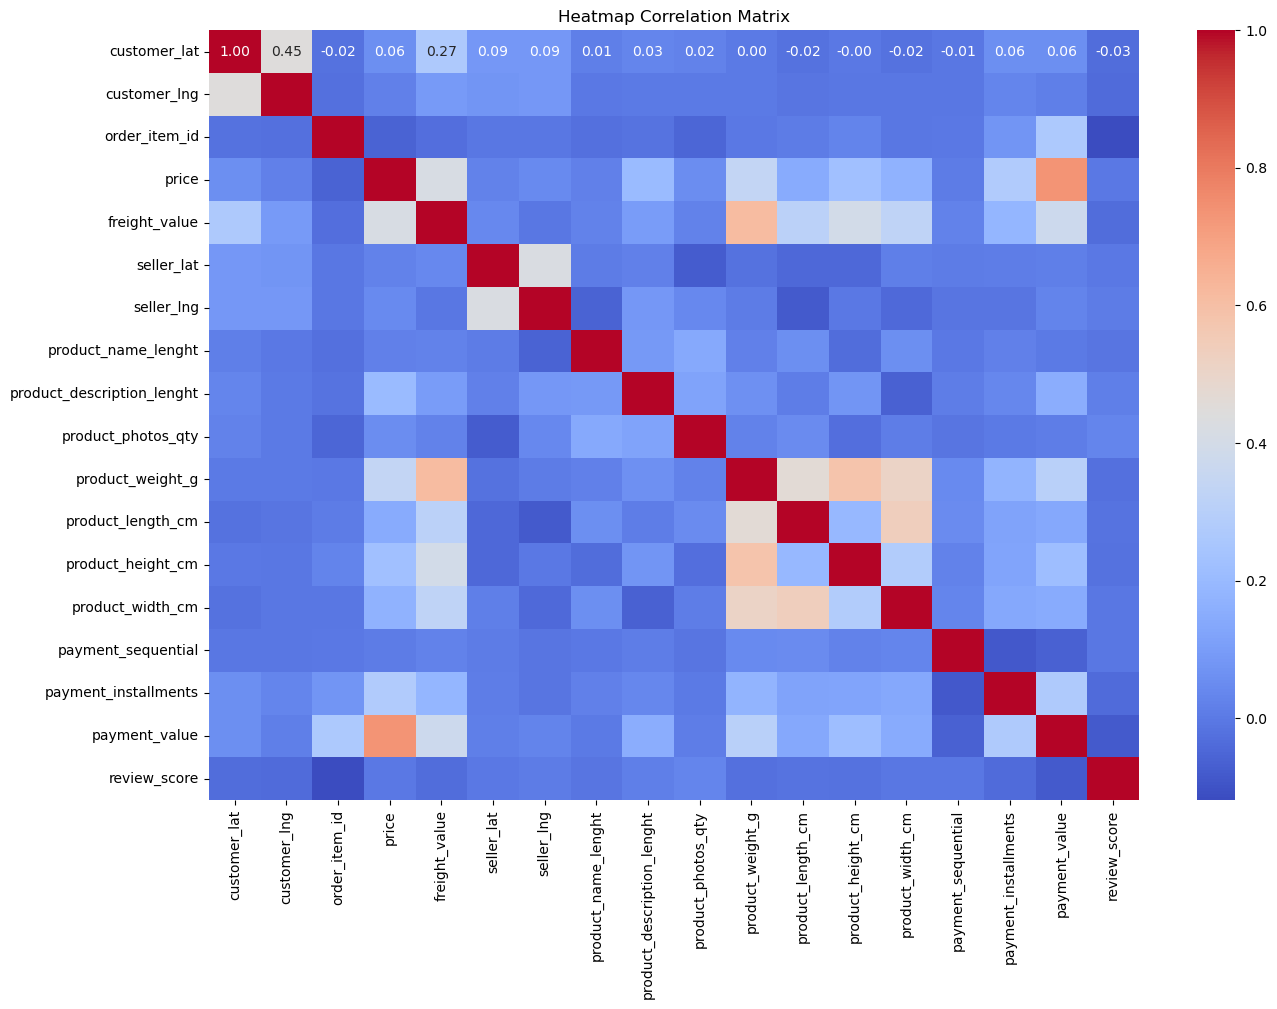

In [33]:
# Heatmap correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap Correlation Matrix")
plt.show()

### Explore Distribusi Data

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

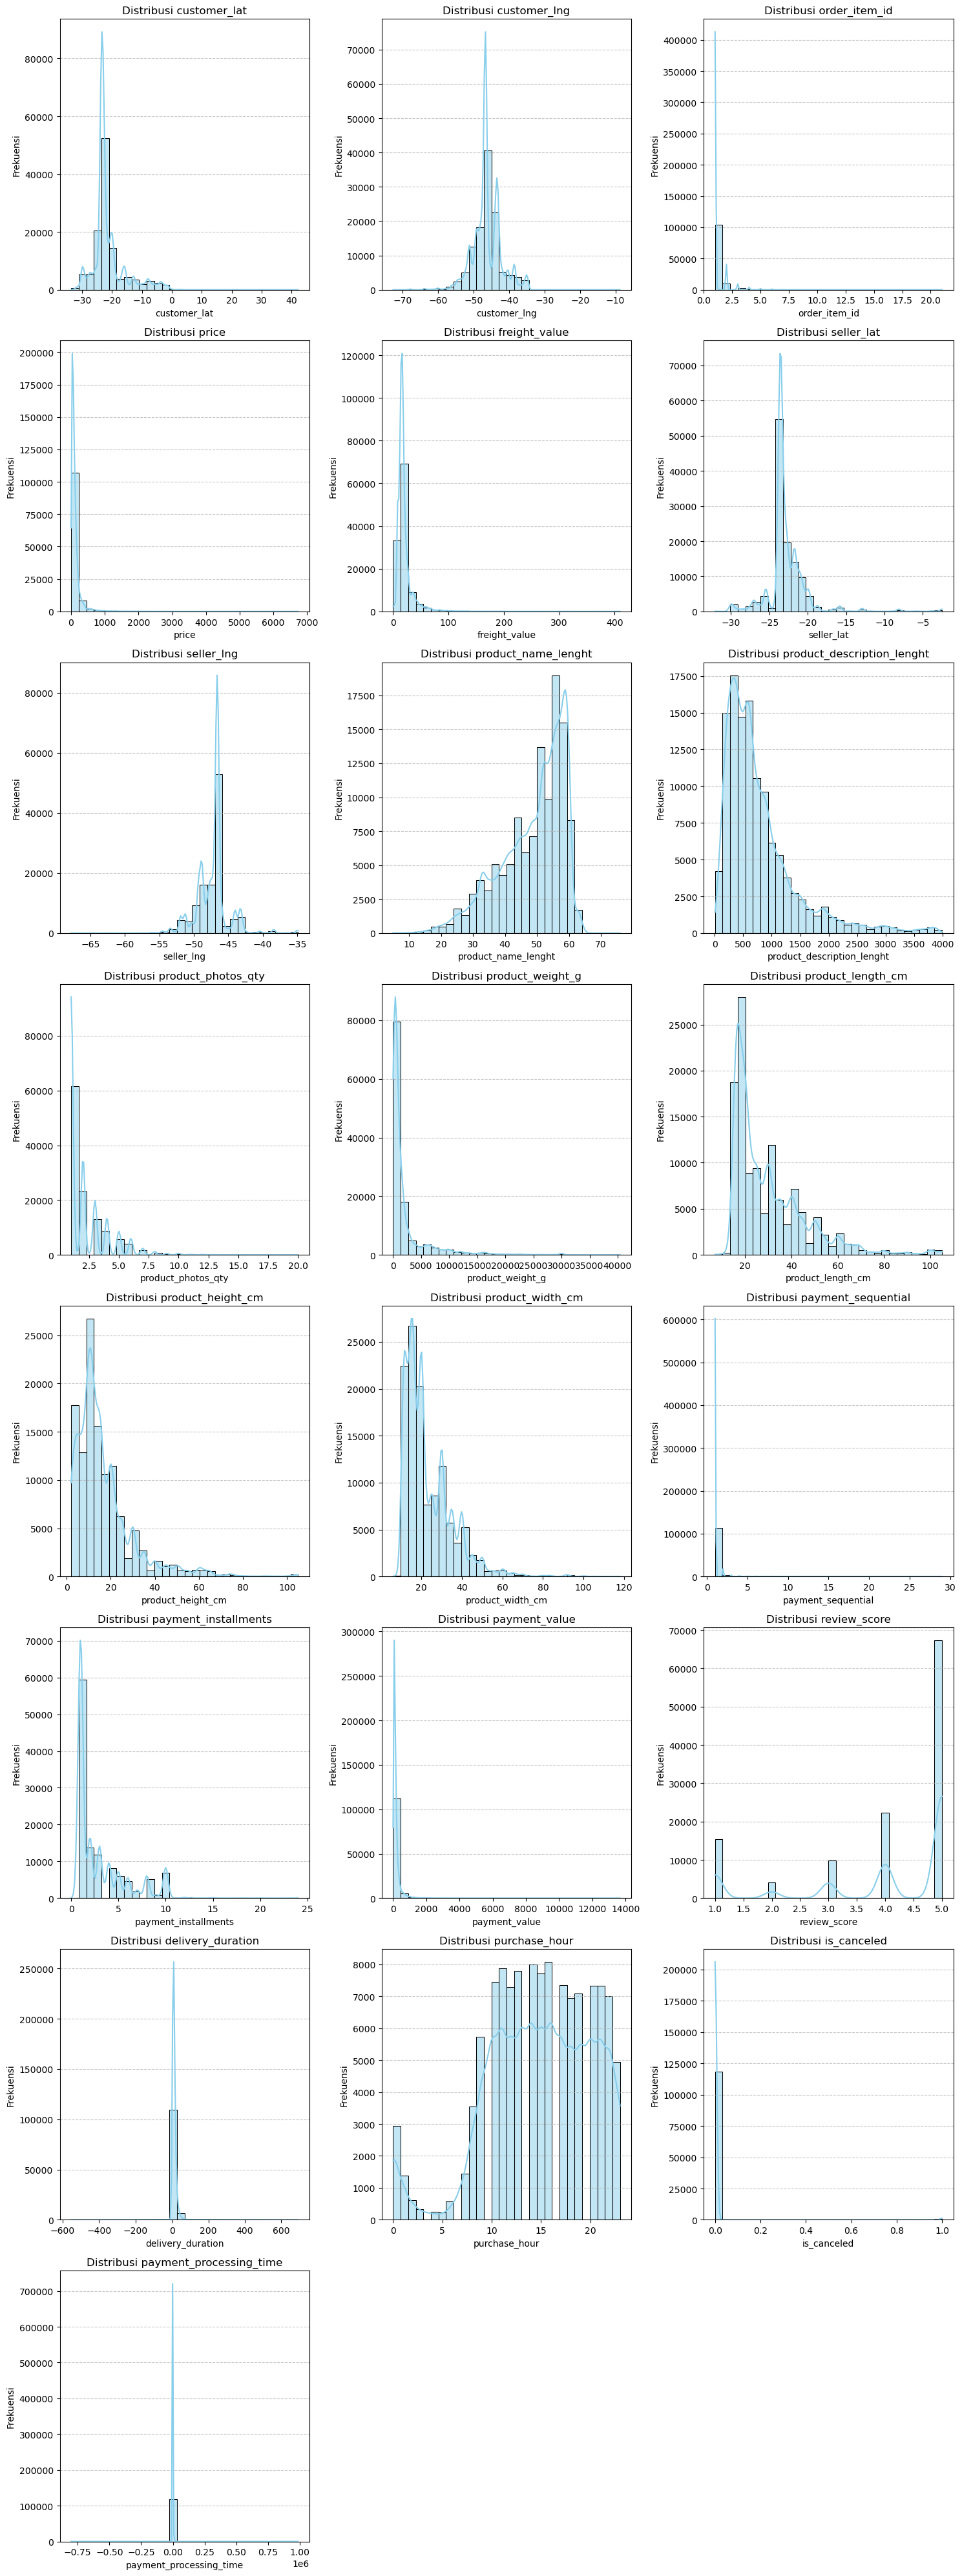

In [58]:
numeric_cols = order.select_dtypes(include=['number']).columns

num_cols = len(numeric_cols)
num_rows = math.ceil(num_cols / 3)

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(order[col], bins=30, kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribusi {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frekuensi")
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

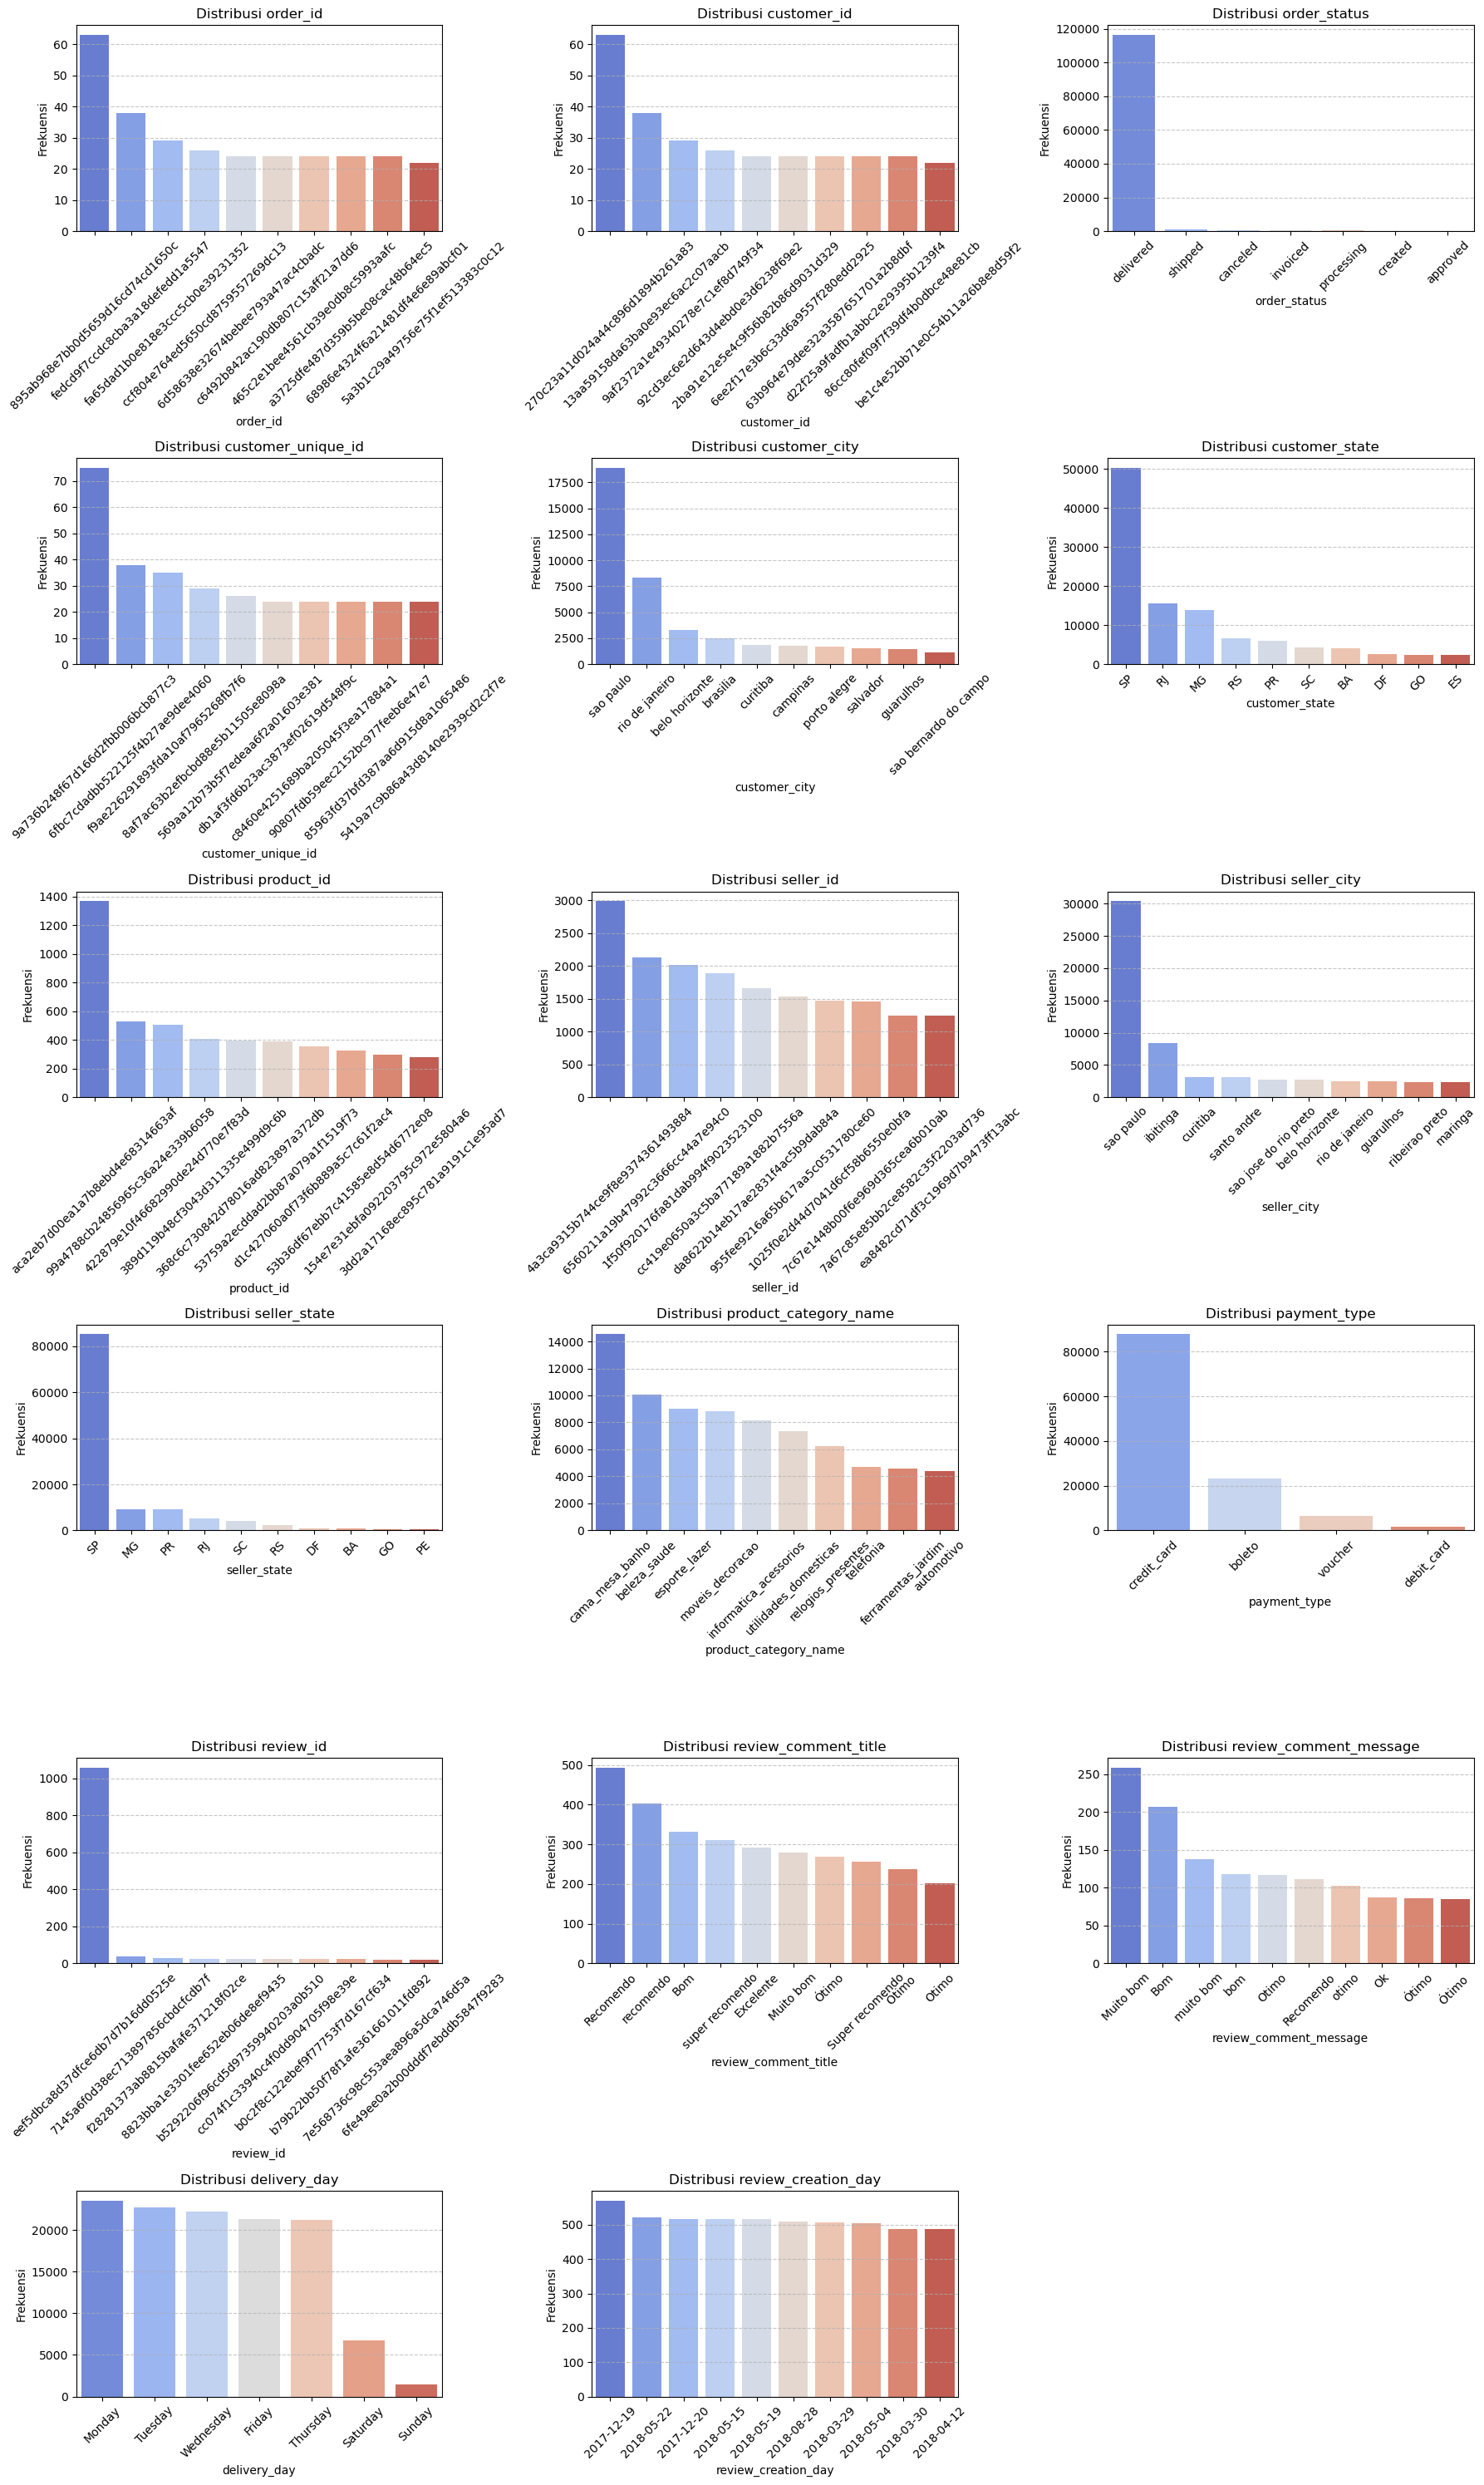

In [59]:
object_cols = order.select_dtypes(include=['object']).columns

num_cols = len(object_cols)
num_rows = math.ceil(num_cols / 3)

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(object_cols):
    value_counts = order[col].value_counts().head(10)
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"Distribusi {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frekuensi")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Insight:**
- Korelasi yang tinggi ditemukan antara ukuran produk (`product_weight_g`, `product_length_cm`, dll.), yang menunjukkan bahwa dimensi produk memang saling berhubungan.
- Harga produk (`price`) memiliki korelasi positif dengan biaya pengiriman (`freight_value`), menunjukkan bahwa semakin mahal produk, semakin tinggi biaya pengirimannya.
- Review Score memiliki korelasi yang sangat lemah dengan variabel lainnya, menunjukkan bahwa kepuasan pelanggan lebih dipengaruhi oleh faktor subjektif.
- Distribusi harga produk menunjukkan adanya beberapa produk dengan harga ekstrem tinggi.
- Freight Value memiliki beberapa outlier ekstrem, dengan beberapa pesanan memiliki ongkos kirim yang jauh lebih tinggi dari rata-rata.
- Jumlah item per pesanan (`order_item_id`) biasanya 1, tetapi ada pesanan dengan lebih dari 20 item, yang mungkin pesanan B2B atau reseller.
- Distribusi bimodal, artinya sebagian besar ulasan berada di skor tinggi (5) atau rendah (1-2), menunjukkan adanya polarized sentiment dari pelanggan.
- Sebagian besar pelanggan dan penjual terkonsentrasi di titik yang sama, menunjukkan adanya pusat perdagangan utama.
- Banyak pelanggan memberikan ulasan positif seperti "Muito bom" (Sangat baik) dan "Recomendo" (Direkomendasikan).

## Visualization & Explanatory Analysis

### **Aspek Pengiriman**

#### Pertanyaan 1: Bagaimana waktu pengiriman rata-rata berdasarkan wilayah pelanggan?

In [71]:
import folium
from folium.plugins import HeatMap

# Buat kolom durasi pengiriman dalam hari
order["delivery_duration"] = (order["order_delivered_customer_date"] - order["order_purchase_timestamp"]).dt.days

# Kelompokkan data berdasarkan latitude & longitude, lalu hitung rata-rata durasi pengiriman
customer_geo_delivery = order.groupby(["customer_lat", "customer_lng"])["delivery_duration"].mean().reset_index()

# Buat peta dengan pusat di Brasil
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=5, control_scale=True)  # Brasil sebagai pusat peta

# Tambahkan heatmap berdasarkan rata-rata waktu pengiriman di setiap lokasi
HeatMap(
    data=customer_geo_delivery[['customer_lat', 'customer_lng', 'delivery_duration']].values, 
    radius=5, blur=12, max_zoom=5,
    gradient={0.2: "blue", 0.4: "green", 0.6: "yellow", 0.8: "orange", 1: "red"}  # Custom warna
).add_to(m)


# Tambahkan Judul ke Peta
title_html = '''
    <h3 align="center" style="font-size:16px"><b>Peta Rata-rata Waktu Pengiriman Berdasarkan Lokasi Pelanggan</b></h3>
'''
m.get_root().html.add_child(folium.Element(title_html))

# Tambahkan Legend (Keterangan)
legend_html = '''
<div style="
    position: fixed;
    bottom: 20px; left: 20px; width: 300px; height: 100px; 
    background-color: white; z-index:9999; font-size:14px;
    border-radius: 5px; padding: 10px; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);">
    <b>Legenda</b><br>
    🔴 = Waktu pengiriman tinggi (lama)<br>
    🟡 = Waktu pengiriman sedang<br>
    🔵 = Waktu pengiriman rendah (cepat)
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Tampilkan peta
m

#### Pertanyaan 2: Seberapa sering pesanan mengalami keterlambatan pengiriman?

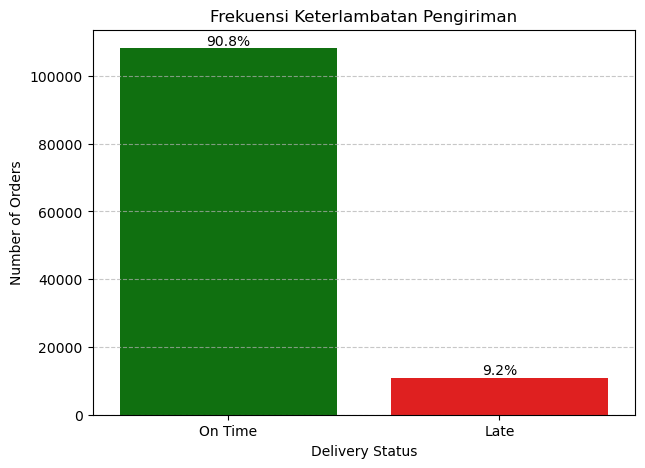

In [72]:
# Buat kolom keterlambatan
order["late_delivery"] = order["order_delivered_customer_date"] > order["order_estimated_delivery_date"]

# Hitung jumlah keterlambatan
late_counts = order["late_delivery"].value_counts()

# Buat bar chart
plt.figure(figsize=(7,5))
ax = sns.barplot(x=late_counts.index, y=late_counts.values, palette=["green", "red"])

# Tambahkan label
plt.xticks(ticks=[0,1], labels=["On Time", "Late"])
plt.xlabel("Delivery Status")
plt.ylabel("Number of Orders")
plt.title("Frekuensi Keterlambatan Pengiriman")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan annotation persentase
total = late_counts.sum()
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

#### Pertanyaan 3: Seberapa besar perbedaan antara rating ulasan pelanggan dan durasi pengiriman pesanan?

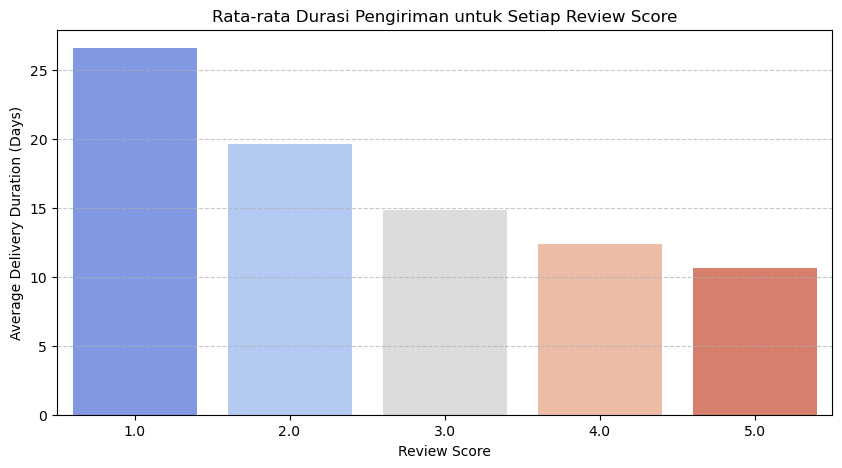

In [37]:
order["delivery_duration"] = (order["order_delivered_customer_date"] - order["order_purchase_timestamp"]).dt.days
review_delivery_avg = order.groupby("review_score")["delivery_duration"].mean()

# Plot barchart
plt.figure(figsize=(10,5))
sns.barplot(x=review_delivery_avg.index, y=review_delivery_avg.values, palette="coolwarm")

plt.xlabel("Review Score")
plt.ylabel("Average Delivery Duration (Days)")
plt.title("Rata-rata Durasi Pengiriman untuk Setiap Review Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Pertanyaan 4: Apakah penjual tertentu memiliki tingkat keterlambatan lebih tinggi dibandingkan yang lain?

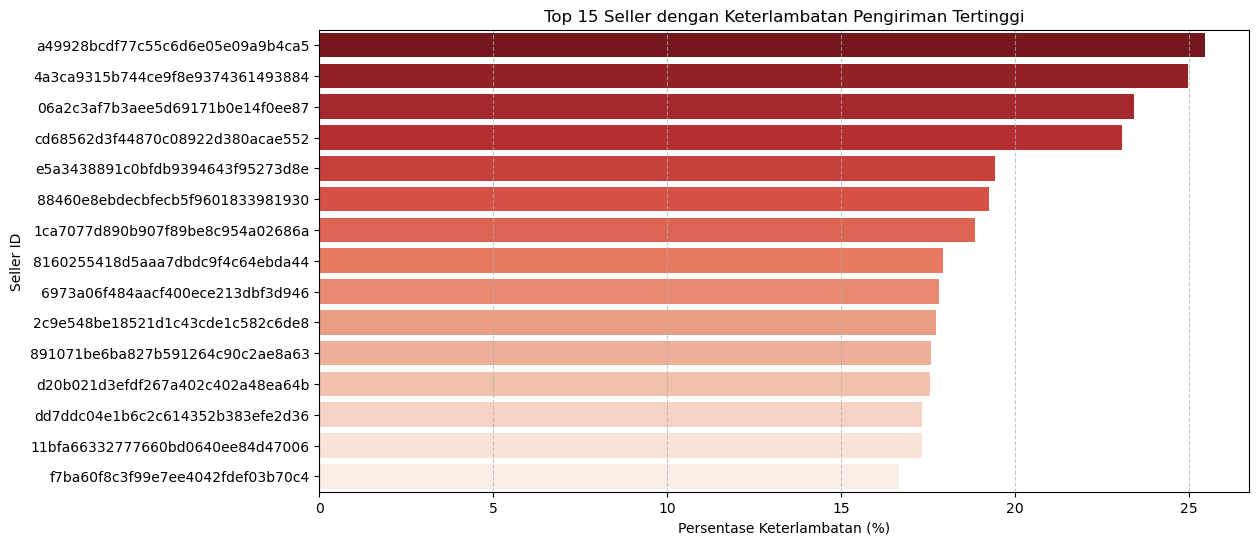

In [38]:
# Buat kolom keterlambatan
order["late_delivery"] = order["order_delivered_customer_date"] > order["order_estimated_delivery_date"]

# Hitung total pesanan dan pesanan terlambat per seller
seller_late = order.groupby("seller_id").agg(
    total_orders=("order_id", "count"),
    late_orders=("late_delivery", "sum")
).reset_index()

# Hitung persentase keterlambatan
seller_late["late_percentage"] = (seller_late["late_orders"] / seller_late["total_orders"]) * 100

# Filter hanya seller dengan jumlah order tinggi (misalnya lebih dari 100 order)
top_sellers = seller_late[seller_late["total_orders"] > 100].sort_values("late_percentage", ascending=False).head(15)

# Plot Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(x="late_percentage", y="seller_id", data=top_sellers, palette="Reds_r")

# Tambahkan label
plt.xlabel("Persentase Keterlambatan (%)")
plt.ylabel("Seller ID")
plt.title("Top 15 Seller dengan Keterlambatan Pengiriman Tertinggi")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

#### Pertanyaan 5: Bagaimana keterlambatan pengiriman memengaruhi rating ulasan pelanggan?

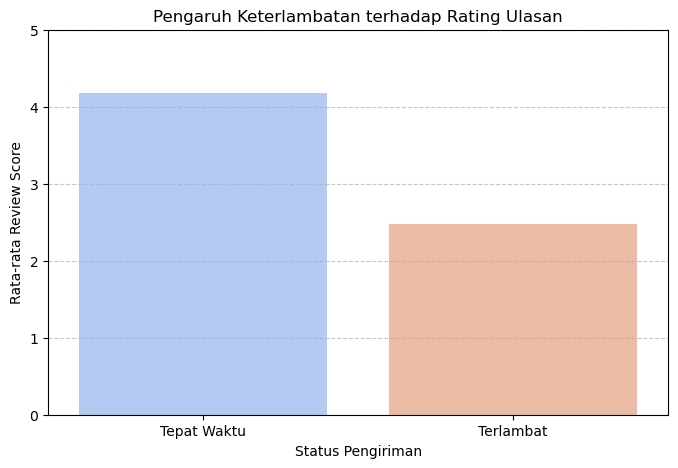

In [39]:
# Hitung keterlambatan
order["late_delivery"] = order["order_delivered_customer_date"] > order["order_estimated_delivery_date"]

# Buat dataframe agregasi rata-rata rating berdasarkan keterlambatan
late_review_avg = order.groupby("late_delivery")["review_score"].mean().reset_index()

# Plot Bar Chart
plt.figure(figsize=(8,5))
sns.barplot(x=late_review_avg["late_delivery"], y=late_review_avg["review_score"], palette="coolwarm")

# Tambahkan label
plt.xticks(ticks=[0,1], labels=["Tepat Waktu", "Terlambat"])
plt.xlabel("Status Pengiriman")
plt.ylabel("Rata-rata Review Score")
plt.title("Pengaruh Keterlambatan terhadap Rating Ulasan")
plt.ylim(0, 5)  # Batas rating 1-5
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

#### Pertanyaan 6: Bagaimana pola keterlambatan dalam hari-hari tertentu dalam seminggu?

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


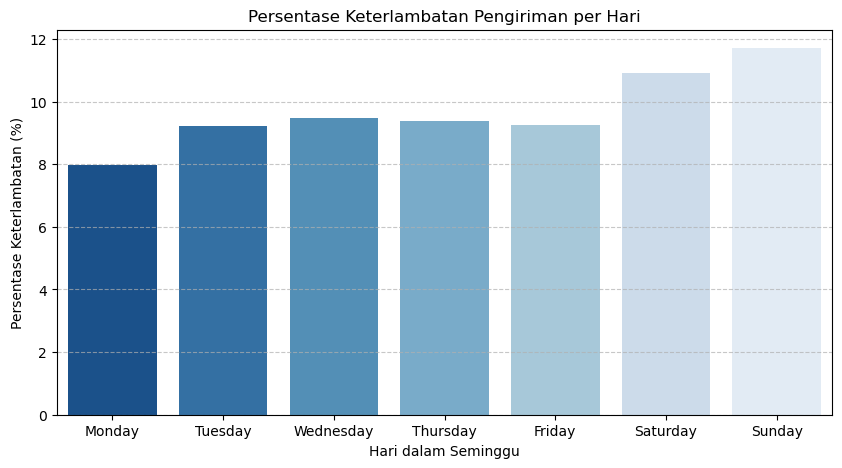

In [40]:
# Ambil hari dari tanggal pengiriman
order["delivery_day"] = order["order_delivered_customer_date"].dt.day_name()

# Hitung jumlah keterlambatan per hari
late_by_day = order.groupby("delivery_day").agg(
    total_orders=("order_id", "count"),
    late_orders=("late_delivery", "sum")
).reset_index()

# Hitung persentase keterlambatan
late_by_day["late_percentage"] = (late_by_day["late_orders"] / late_by_day["total_orders"]) * 100

# Urutkan berdasarkan urutan hari (bukan alfabet)
order_of_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
late_by_day["delivery_day"] = pd.Categorical(late_by_day["delivery_day"], categories=order_of_days, ordered=True)
late_by_day = late_by_day.sort_values("delivery_day")

# Plot Bar Chart
plt.figure(figsize=(10,5))
sns.barplot(x="delivery_day", y="late_percentage", data=late_by_day, palette="Blues_r")

# Tambahkan label
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Persentase Keterlambatan (%)")
plt.title("Persentase Keterlambatan Pengiriman per Hari")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


#### Pertanyaan 7: Apakah pesanan dengan ongkos kirim lebih mahal memiliki keterlambatan lebih sedikit?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18868\808492245.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freight_late = order.groupby("freight_category").agg(
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


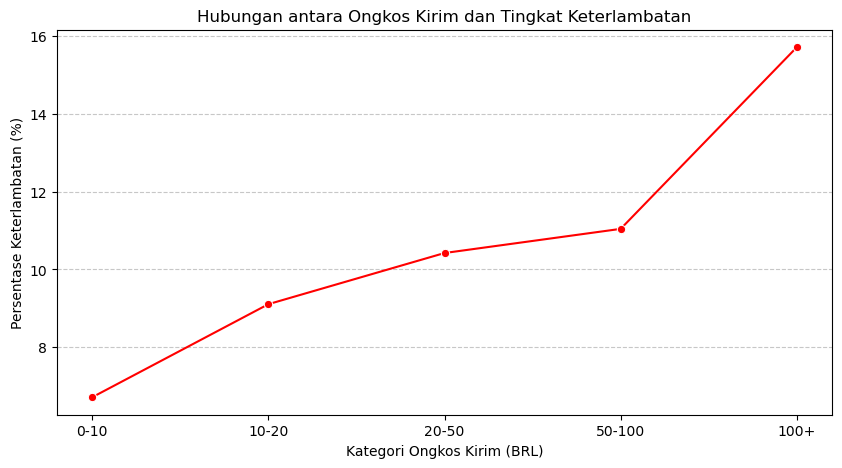

In [41]:
# Buat kategori ongkos kirim
order["freight_category"] = pd.cut(order["freight_value"], bins=[0, 10, 20, 50, 100, 500], labels=["0-10", "10-20", "20-50", "50-100", "100+"])

# Hitung keterlambatan berdasarkan kategori ongkos kirim
freight_late = order.groupby("freight_category").agg(
    total_orders=("order_id", "count"),
    late_orders=("late_delivery", "sum")
).reset_index()

# Hitung persentase keterlambatan
freight_late["late_percentage"] = (freight_late["late_orders"] / freight_late["total_orders"]) * 100

# Plot Line Chart
plt.figure(figsize=(10,5))
sns.lineplot(x=freight_late["freight_category"], y=freight_late["late_percentage"], marker="o", linestyle="-", color="red")

# Tambahkan label
plt.xlabel("Kategori Ongkos Kirim (BRL)")
plt.ylabel("Persentase Keterlambatan (%)")
plt.title("Hubungan antara Ongkos Kirim dan Tingkat Keterlambatan")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### **Aspek Produk dan Penjualan**

#### Pertanyaan 1: Produk kategori apa yang memiliki penjualan tertinggi dan terendah dalam keseluruhan data?

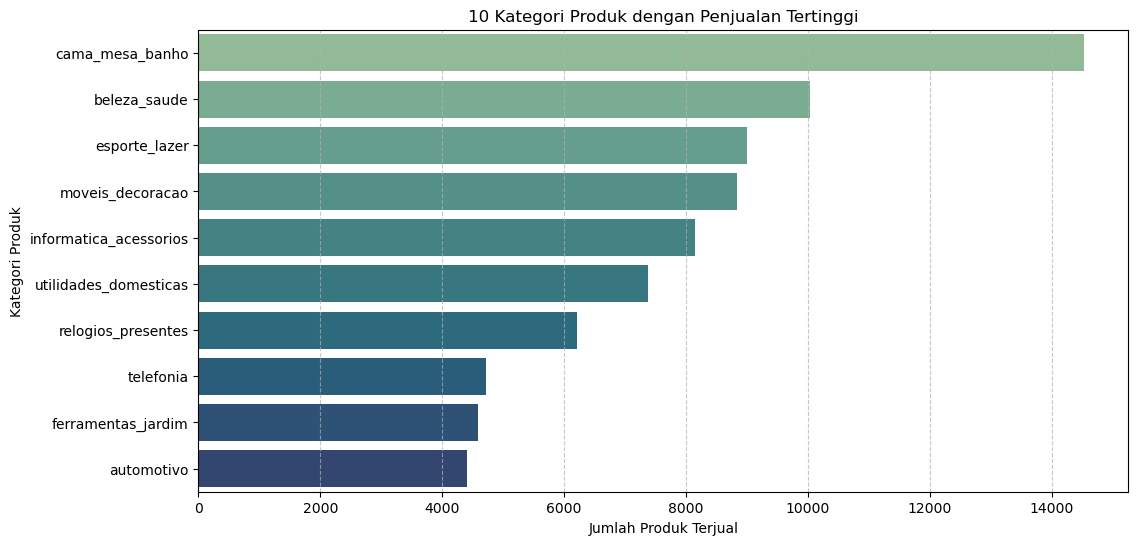

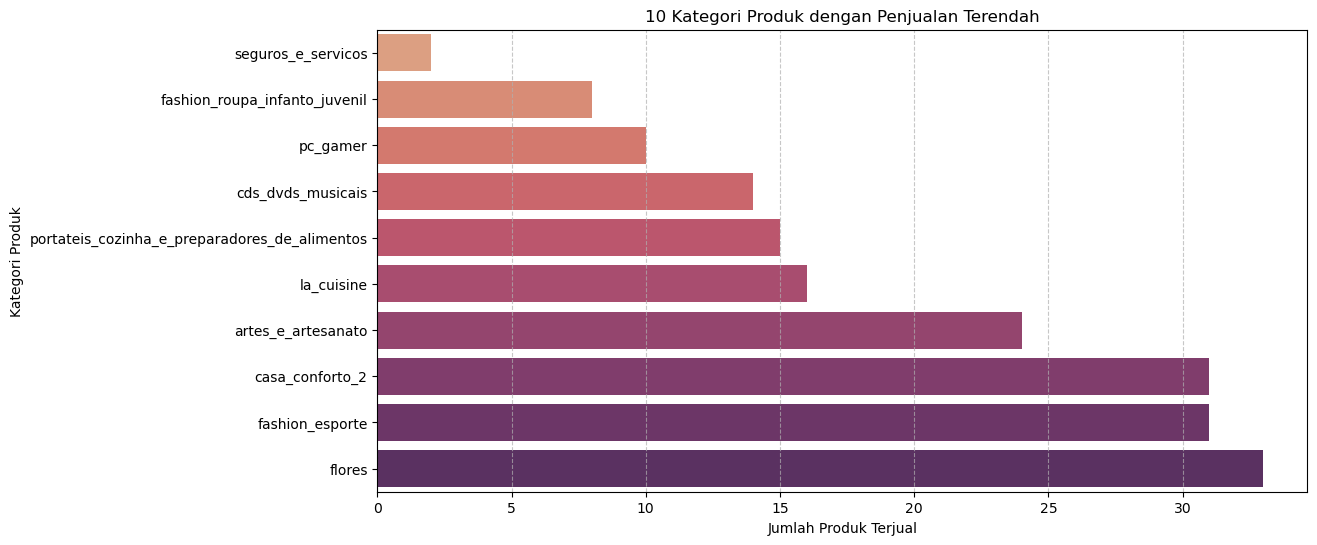

In [42]:
# Hitung jumlah total produk yang terjual berdasarkan kategori
product_sales = order["product_category_name"].value_counts()

# Ambil 10 kategori dengan penjualan tertinggi
top_product_sales = product_sales.nlargest(10)

# Ambil 10 kategori dengan penjualan terendah
bottom_product_sales = product_sales.nsmallest(10)

# Visualisasi: Kategori dengan Penjualan Tertinggi
plt.figure(figsize=(12,6))
sns.barplot(x=top_product_sales.values, y=top_product_sales.index, palette="crest")

plt.xlabel("Jumlah Produk Terjual")
plt.ylabel("Kategori Produk")
plt.title("10 Kategori Produk dengan Penjualan Tertinggi")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Visualisasi: Kategori dengan Penjualan Terendah
plt.figure(figsize=(12,6))
sns.barplot(x=bottom_product_sales.values, y=bottom_product_sales.index, palette="flare")

plt.xlabel("Jumlah Produk Terjual")
plt.ylabel("Kategori Produk")
plt.title("10 Kategori Produk dengan Penjualan Terendah")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Pertanyaan 2: Produk dengan harga berapa yang paling sering dibeli pelanggan?

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


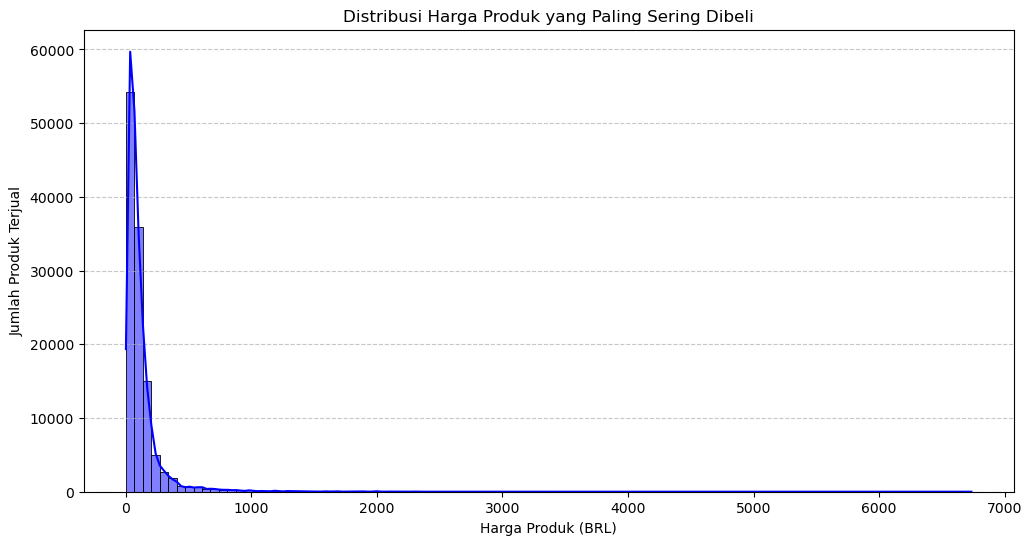

In [73]:
plt.figure(figsize=(12,6))
sns.histplot(order["price"], bins=100, kde=True, color="blue")

plt.xlabel("Harga Produk (BRL)")
plt.ylabel("Jumlah Produk Terjual")
plt.title("Distribusi Harga Produk yang Paling Sering Dibeli")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Pertanyaan 3: Penjual mana yang memiliki jumlah pesanan tertinggi?

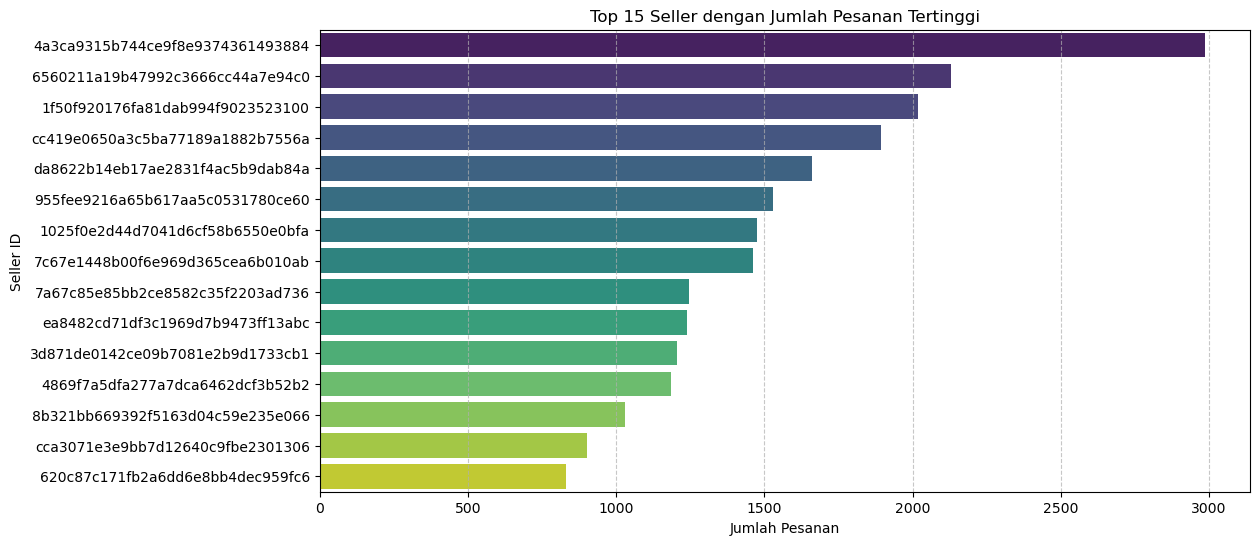

In [44]:
# Hitung jumlah pesanan per seller
seller_orders = order.groupby("seller_id")["order_id"].count().reset_index()

# Urutkan berdasarkan jumlah pesanan tertinggi
top_sellers = seller_orders.sort_values("order_id", ascending=False).head(15)

# Plot Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(x="order_id", y="seller_id", data=top_sellers, palette="viridis")

# Tambahkan label
plt.xlabel("Jumlah Pesanan")
plt.ylabel("Seller ID")
plt.title("Top 15 Seller dengan Jumlah Pesanan Tertinggi")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

#### Pertanyaan 4: Bagaimana pola pembelian pelanggan berdasarkan waktu dalam sehari atau hari dalam seminggu?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18868\1224710940.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_orders = order.groupby("purchase_day")["order_id"].count().reset_index()
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


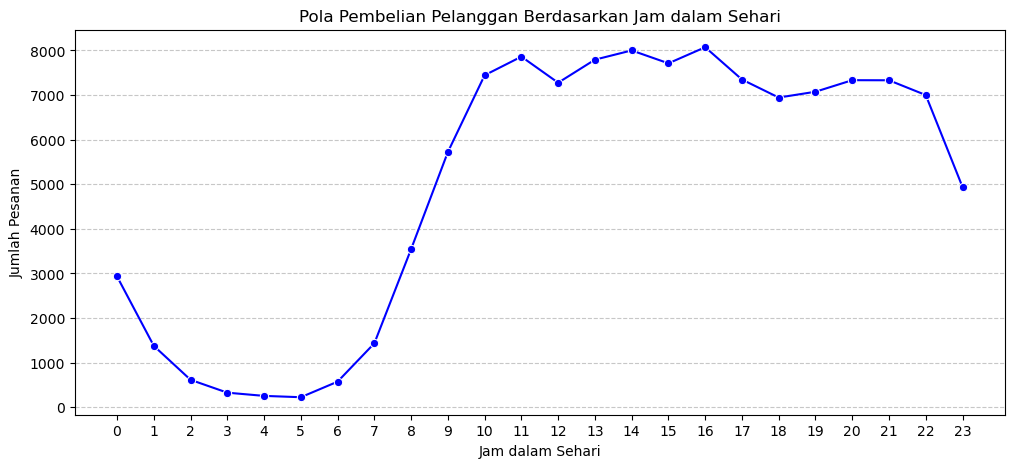

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


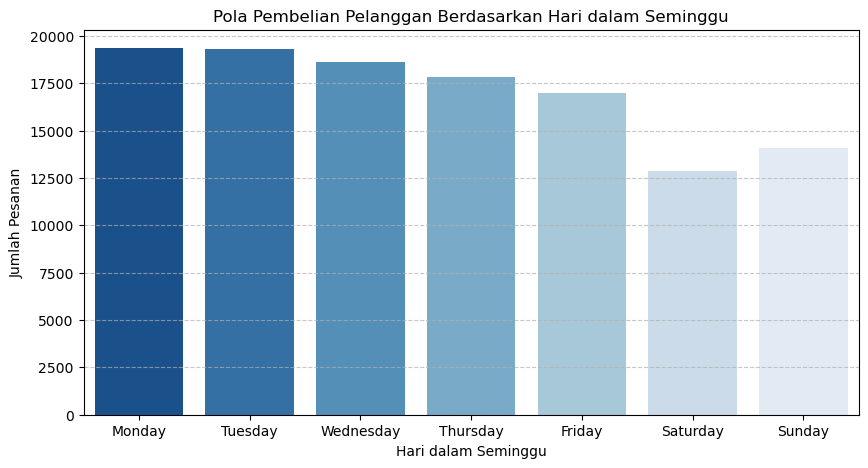

In [45]:
# Ekstrak jam dan hari dari waktu pembelian
order["purchase_hour"] = order["order_purchase_timestamp"].dt.hour
order["purchase_day"] = order["order_purchase_timestamp"].dt.day_name()

# Urutkan hari dalam seminggu
order_of_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
order["purchase_day"] = pd.Categorical(order["purchase_day"], categories=order_of_days, ordered=True)

# Hitung jumlah pesanan per jam
hourly_orders = order.groupby("purchase_hour")["order_id"].count().reset_index()

# Hitung jumlah pesanan per hari
daily_orders = order.groupby("purchase_day")["order_id"].count().reset_index()

# Plot Line Chart (Pesanan per Jam)
plt.figure(figsize=(12,5))
sns.lineplot(x="purchase_hour", y="order_id", data=hourly_orders, marker="o", linestyle="-", color="blue")

plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Pesanan")
plt.title("Pola Pembelian Pelanggan Berdasarkan Jam dalam Sehari")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(range(0,24))  # Pastikan semua jam tampil

plt.show()
# Plot Bar Chart (Pesanan per Hari)
plt.figure(figsize=(10,5))
sns.barplot(x="purchase_day", y="order_id", data=daily_orders, palette="Blues_r")

plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Pesanan")
plt.title("Pola Pembelian Pelanggan Berdasarkan Hari dalam Seminggu")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


### **Aspek Pelanggan**

#### Pertanyaan 1: Bagaimana tren kepuasan pelanggan per bulan berdasarkan ulasan dalam keseluruhan data?

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


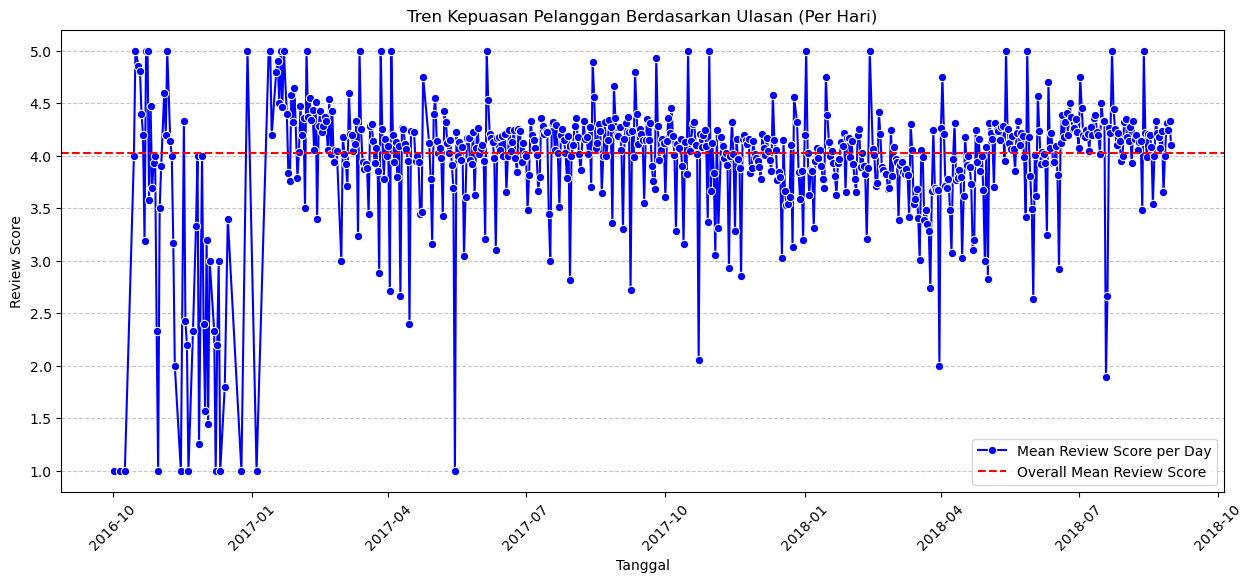

In [46]:
order['review_creation_day'] = order['review_creation_date'].dt.date
review_trend_daily = order.groupby('review_creation_day')['review_score'].mean()
overall_mean = np.mean(order['review_score'])

plt.figure(figsize=(15,6))
sns.lineplot(x=review_trend_daily.index, y=review_trend_daily.values, marker='o', color='blue', label='Mean Review Score per Day')
plt.axhline(y=overall_mean, color='red', linestyle='dashed', label='Overall Mean Review Score')
plt.xlabel('Tanggal')
plt.ylabel('Review Score')
plt.title('Tren Kepuasan Pelanggan Berdasarkan Ulasan (Per Hari)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Pertanyaan 2: Dari mana lokasi pelanggan yang paling banyak melakukan transaksi?

In [47]:
# Kelompokkan data berdasarkan latitude & longitude, lalu hitung jumlah transaksi di setiap lokasi
customer_geo = order.groupby(["customer_lat", "customer_lng"]).size().reset_index(name="transaction_count")

# Buat peta dengan pusat di Brasil
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=5, control_scale=True)  # Brasil sebagai pusat peta

# Tambahkan heatmap berdasarkan jumlah transaksi di setiap lokasi
HeatMap(data=customer_geo[['customer_lat', 'customer_lng', 'transaction_count']].values, 
        radius=10, blur=15, max_zoom=1).add_to(m)

# Tambahkan Judul ke Peta
title_html = '''
    <h3 align="center" style="font-size:16px"><b>Peta Sebaran Pelanggan Berdasarkan Jumlah Transaksi</b></h3>
'''
m.get_root().html.add_child(folium.Element(title_html))

# Tambahkan Legend (Keterangan)
legend_html = '''
<div style="
    position: fixed;
    bottom: 20px; left: 20px; width: 300px; height: 100px; 
    background-color: white; z-index:9999; font-size:14px;
    border-radius: 5px; padding: 10px; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);">
    <b>Legenda</b><br>
    🔴 = Kepadatan transaksi tinggi<br>
    🟡 = Kepadatan transaksi sedang<br>
    🔵 = Kepadatan transaksi rendah
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Tampilkan peta
m

#### Pertanyaan 3: Seberapa sering pelanggan melakukan repeat orders?

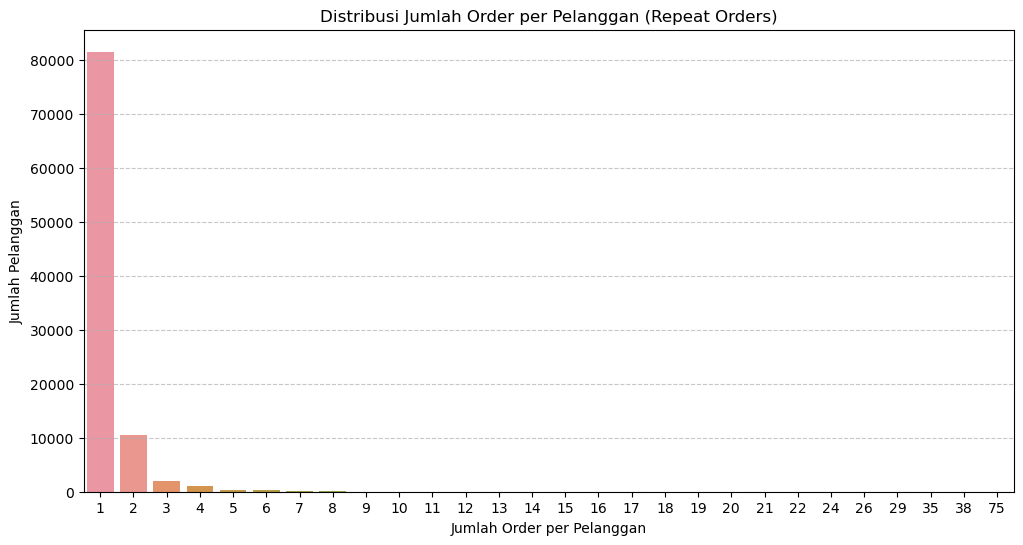

In [48]:
# Hitung jumlah transaksi per pelanggan
customer_orders = order.groupby("customer_unique_id")["order_id"].count().reset_index()
customer_orders.columns = ["customer_unique_id", "order_count"]

# Hitung jumlah pelanggan berdasarkan jumlah pesanan mereka
repeat_order_counts = customer_orders["order_count"].value_counts().sort_index()

# Visualisasi dengan barchart
plt.figure(figsize=(12,6))
sns.barplot(x=repeat_order_counts.index, y=repeat_order_counts.values)

plt.xlabel("Jumlah Order per Pelanggan")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Jumlah Order per Pelanggan (Repeat Orders)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Pertanyaan 4: Bagaimana tren pertumbuhan jumlah pelanggan baru terhadap pelanggan lama?

<Figure size 1200x600 with 0 Axes>

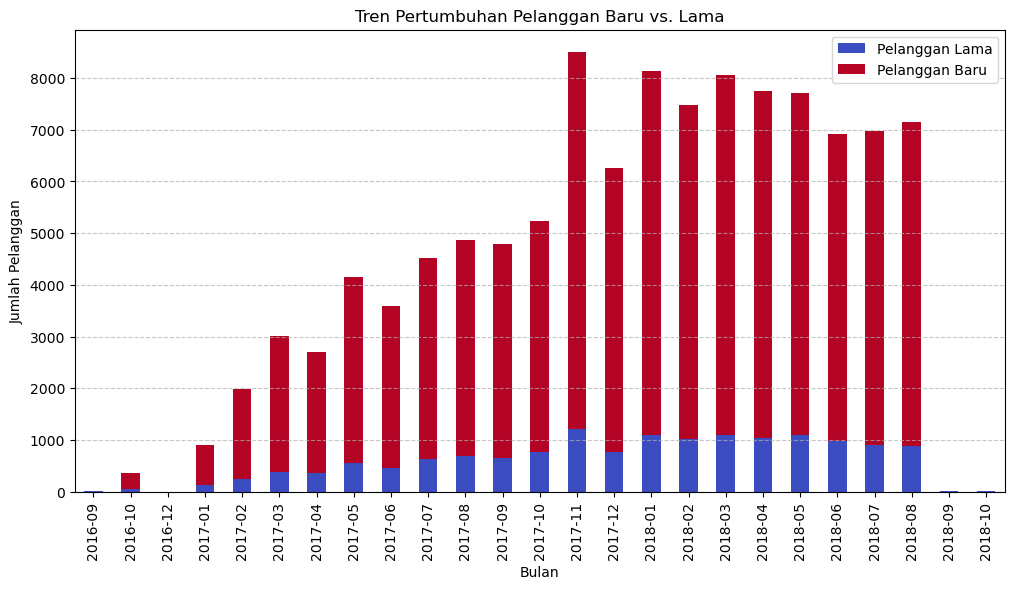

In [49]:
# Urutkan data berdasarkan waktu pembelian
order = order.sort_values("order_purchase_timestamp")

# Identifikasi pelanggan pertama kali melakukan pembelian
order["is_new_customer"] = ~order.duplicated(subset=["customer_unique_id"], keep="first")

# Kelompokkan data berdasarkan bulan
order["purchase_month"] = order["order_purchase_timestamp"].dt.to_period("M")

# Hitung jumlah pelanggan baru dan lama setiap bulan
customer_trend = order.groupby(["purchase_month", "is_new_customer"])["customer_unique_id"].nunique().unstack().reset_index()
customer_trend.columns = ["purchase_month", "existing_customers", "new_customers"]

# Plot Stacked Bar Chart
plt.figure(figsize=(12,6))
customer_trend.set_index("purchase_month").plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12,6))

# Tambahkan label
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pelanggan")
plt.title("Tren Pertumbuhan Pelanggan Baru vs. Lama")
plt.legend(["Pelanggan Lama", "Pelanggan Baru"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### **Aspek Pembayaran**

#### Pertanyaan 1: Bagaimana pola pembayaran pelanggan dan metode pembayaran yang paling sering digunakan dalam keseluruhan data?

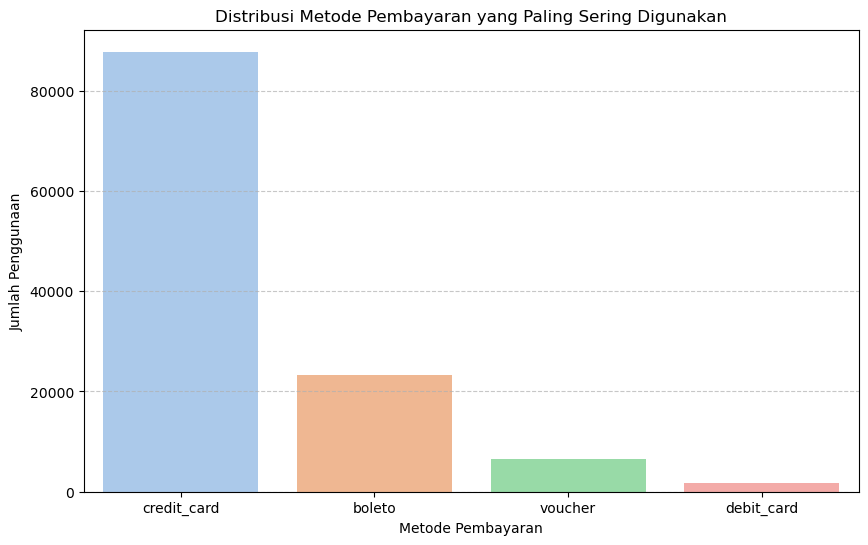

In [50]:
# Hitung jumlah penggunaan setiap metode pembayaran
payment_methods = order["payment_type"].value_counts()

# Visualisasi: Bar chart metode pembayaran
plt.figure(figsize=(10,6))
sns.barplot(x=payment_methods.index, y=payment_methods.values, palette="pastel")

plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Penggunaan")
plt.title("Distribusi Metode Pembayaran yang Paling Sering Digunakan")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

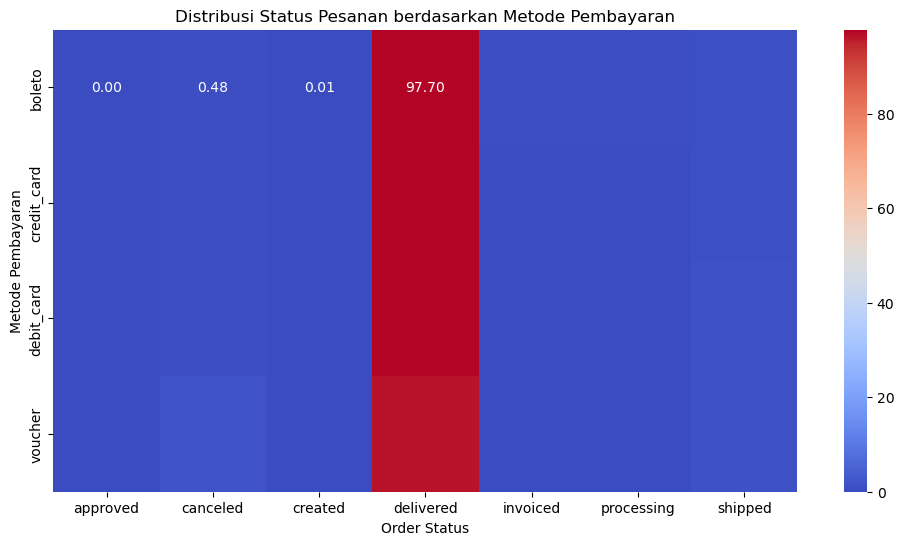

In [51]:
# Buat crosstab untuk melihat distribusi status pesanan berdasarkan metode pembayaran
payment_status_ct = pd.crosstab(order["payment_type"], order["order_status"], normalize="index") * 100

# Visualisasi dengan heatmap
plt.figure(figsize=(12,6))
sns.heatmap(payment_status_ct, annot=True, cmap="coolwarm", fmt=".2f")

plt.xlabel("Order Status")
plt.ylabel("Metode Pembayaran")
plt.title("Distribusi Status Pesanan berdasarkan Metode Pembayaran")
plt.show()

#### Pertanyaan 2: Apakah meotde pembayaran tertentu berkorelasi dengan tingkat pembatalan pesanan?

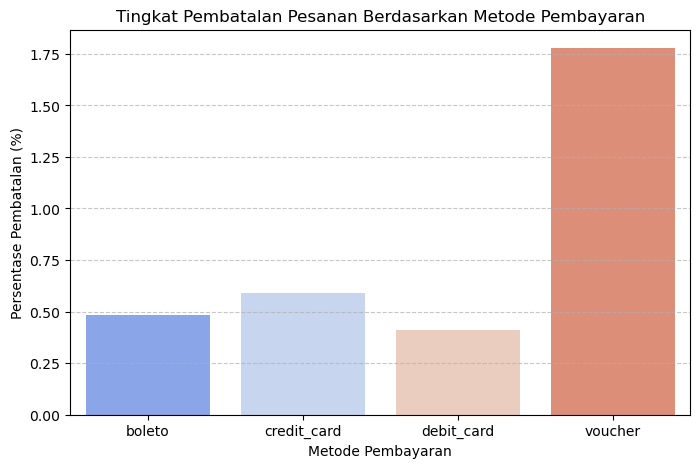

In [52]:
# Buat kolom biner untuk menandai pembatalan pesanan
order["is_canceled"] = (order["order_status"] == "canceled").astype(int)

# Hitung jumlah pesanan dan jumlah pembatalan per metode pembayaran
cancellation_rate = order.groupby("payment_type").agg(
    total_orders=("order_id", "count"),
    canceled_orders=("is_canceled", "sum")
).reset_index()

# Hitung persentase pembatalan
cancellation_rate["cancellation_rate"] = (cancellation_rate["canceled_orders"] / cancellation_rate["total_orders"]) * 100

# Plot Bar Chart
plt.figure(figsize=(8,5))
sns.barplot(x="payment_type", y="cancellation_rate", data=cancellation_rate, palette="coolwarm")

# Tambahkan label
plt.xlabel("Metode Pembayaran")
plt.ylabel("Persentase Pembatalan (%)")
plt.title("Tingkat Pembatalan Pesanan Berdasarkan Metode Pembayaran")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

#### Pertanyaan 3: Apakah ada perbedaan dalam waktu proses pembayaran antarmetode pembayaran?

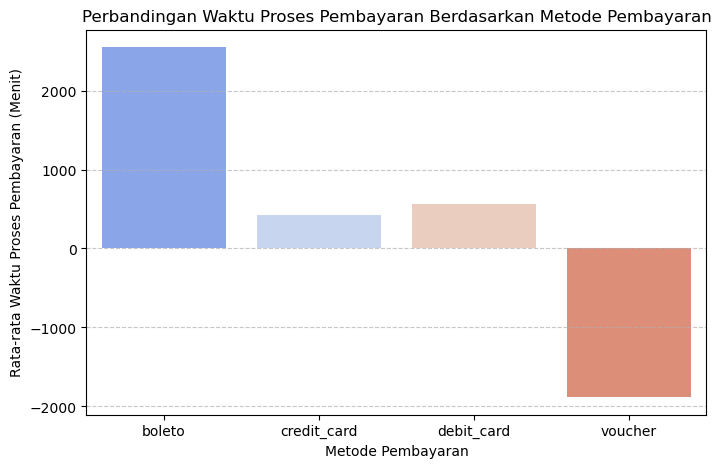

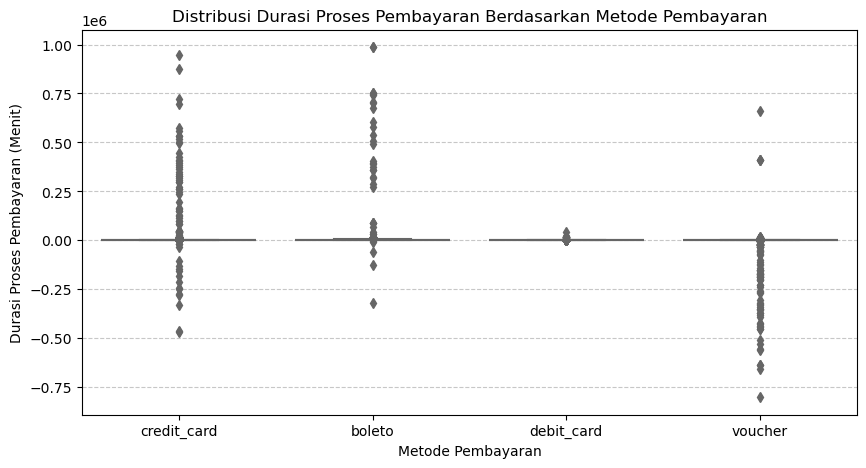

In [53]:
# Hitung durasi proses pembayaran dalam menit
order["payment_processing_time"] = (order["order_approved_at"] - order["order_purchase_timestamp"]).dt.total_seconds() / 60

# Hitung rata-rata durasi pembayaran per metode
payment_time_avg = order.groupby("payment_type")["payment_processing_time"].mean().reset_index()

# Plot Bar Chart (Rata-rata Waktu Proses Pembayaran)
plt.figure(figsize=(8,5))
sns.barplot(x="payment_type", y="payment_processing_time", data=payment_time_avg, palette="coolwarm")

# Tambahkan label
plt.xlabel("Metode Pembayaran")
plt.ylabel("Rata-rata Waktu Proses Pembayaran (Menit)")
plt.title("Perbandingan Waktu Proses Pembayaran Berdasarkan Metode Pembayaran")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# Plot Box Plot (Variasi Durasi Pembayaran)
plt.figure(figsize=(10,5))
sns.boxplot(x="payment_type", y="payment_processing_time", data=order, palette="coolwarm")

# Tambahkan label
plt.xlabel("Metode Pembayaran")
plt.ylabel("Durasi Proses Pembayaran (Menit)")
plt.title("Distribusi Durasi Proses Pembayaran Berdasarkan Metode Pembayaran")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

**Insight:**
- Sebagian pelanggan terletak di Sao Paulo.
- Pembelian pada *weekend* lebih banyak mengalami keterlambatan pengiriman.
- Pembelian paling banyak terjadi pada siang sampai malam hari.
- Secara rata-rata, pelanggan mendapatkan kepuasan dalam membeli barang menggunakan E-Commerce tersebut.
- Proses pembayaran dengan *voucher* bernilai negatif. Hal ini mengindikasikan bahwa *voucher* diproses atau diverifikasi lebih awal daripada transaksi utama.

## Analisis Lanjutan (Opsional)

RFM Analysis.
(Source:  https://documentation.bloomreach.com/engagement/docs/rfm-segmentation)

In [54]:
# Gunakan data order
rfm_data = order.copy()

# Konversi order_purchase_timestamp ke datetime
rfm_data["order_purchase_timestamp"] = pd.to_datetime(rfm_data["order_purchase_timestamp"])

# Tentukan tanggal referensi (hari terakhir transaksi dalam dataset)
latest_date = rfm_data["order_purchase_timestamp"].max()

# Hitung RFM Metrics
rfm = rfm_data.groupby("customer_unique_id").agg({
    "order_purchase_timestamp": lambda x: (latest_date - x.max()).days,  # Recency: Hari sejak transaksi terakhir
    "order_id": "count",  # Frequency: Jumlah transaksi
    "payment_value": "sum"  # Monetary: Total belanja
})

# Ubah nama kolom
rfm.columns = ["Recency", "Frequency", "Monetary"]

# Perbaiki binning untuk Frequency dan Monetary
rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1])
rfm["F_Score"] = pd.cut(rfm["Frequency"], bins=[0,1,2,5,10,rfm["Frequency"].max()], labels=[1,2,3,4,5], include_lowest=True)
rfm["M_Score"] = pd.cut(rfm["Monetary"], bins=[0,50,100,200,500,rfm["Monetary"].max()], labels=[1,2,3,4,5], include_lowest=True)

# Gabungkan skor RFM untuk segmentasi
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)

rfm

Recency  Frequency  Monetary R_Score  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2      160          1    141.90       4   
0000b849f77a49e4a4ce2b2a4ca5be3f      163          1     27.19       4   
0000f46a3911fa3c0805444483337064      585          1     86.22       1   
0000f6ccb0745a6a4b88665a16c9f078      369          1     43.62       2   
0004aac84e0df4da2b147fca70cf8255      336          1    196.89       2   
...                                   ...        ...       ...     ...   
fffcf5a5ff07b0908bd4e2dbc735a684      495          2   4134.84       1   
fffea47cd6d3cc0a88bd621562a9d061      310          1     84.58       3   
ffff371b4d645b6ecea244b27531430a      617          1    112.46       1   
ffff5962728ec6157033ef9805bacc48      168          1    133.69       4   
ffffd2657e2aad2907e67c3e9daecbeb      532          1     71.56       1   

                                 F_Score M_Score RFM_Score  
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2       1       3       413  
0000b849f77a49e4a4ce2b2a4ca5be3f       1       1       411  
0000f46a3911fa3c0805444483337064       1       2       112  
0000f6ccb0745a6a4b88665a16c9f078       1       1       211  
0004aac84e0df4da2b147fca70cf8255       1       3       213  
...                                  ...     ...       ...  
fffcf5a5ff07b0908bd4e2dbc735a684       2       5       125  
fffea47cd6d3cc0a88bd621562a9d061       1       2       312  
ffff371b4d645b6ecea244b27531430a       1       3       113  
ffff5962728ec6157033ef9805bacc48       1       3       413  
ffffd2657e2aad2907e67c3e9daecbeb       1       2       112  

[96096 rows x 7 columns]

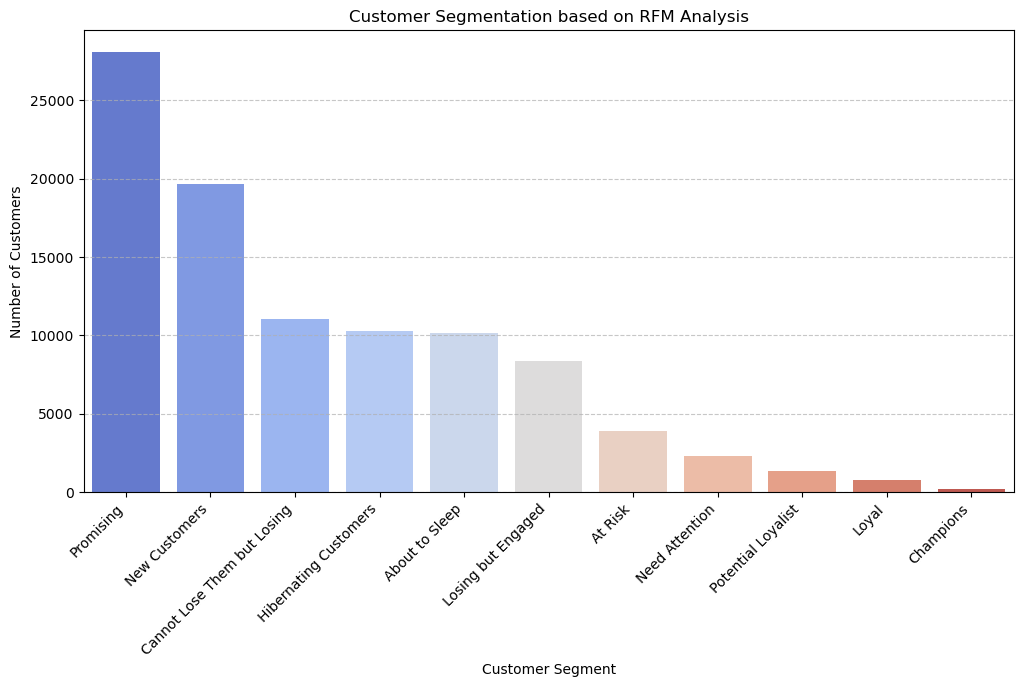

In [55]:
# Define the segment mapping based on the provided criteria
segment_mapping = {
    "Champions": ["555", "554", "544", "545", "454", "455", "445"],
    "Loyal": ["543", "444", "435", "355", "354", "345", "344", "335"],
    "Potential Loyalist": ["553", "551", "552", "541", "542", "533", "532", "531", "452", "451",
                           "442", "441", "431", "453", "433", "432", "423", "353", "352", "351",
                           "342", "341", "333", "323"],
    "New Customers": ["512", "511", "422", "421", "412", "411", "311"],
    "Promising": ["525", "524", "523", "522", "521", "515", "514", "513", "425", "424", "413",
                  "414", "415", "315", "314", "313"],
    "Need Attention": ["535", "534", "443", "434", "343", "334", "325", "324"],
    "About to Sleep": ["331", "321", "312", "221", "213", "231", "241", "251"],
    "Cannot Lose Them but Losing": ["155", "154", "144", "214", "215", "115", "114", "113"],
    "At Risk": ["255", "254", "245", "244", "253", "252", "243", "242", "235", "234", "225",
                "224", "153", "152", "145", "143", "142", "135", "134", "133", "125", "124"],
    "Hibernating Customers": ["332", "322", "233", "232", "223", "222", "132", "123", "122",
                               "212", "211"],
    "Losing but Engaged": ["111", "112", "121", "131", "141", "151"],
    "Lost Customers": ["111", "112", "121", "131", "141", "151"]
}

# Function to map RFM Score to Segment
def map_rfm_segment(rfm_score):
    for segment, scores in segment_mapping.items():
        if rfm_score in scores:
            return segment
    return "Other"

# Apply segmentation
rfm["Segment"] = rfm["RFM_Score"].apply(map_rfm_segment)

# Count customers in each segment
segment_counts = rfm["Segment"].value_counts()

# Plot customer segmentation
plt.figure(figsize=(12, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.title("Customer Segmentation based on RFM Analysis")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Wordcloud ulasan:

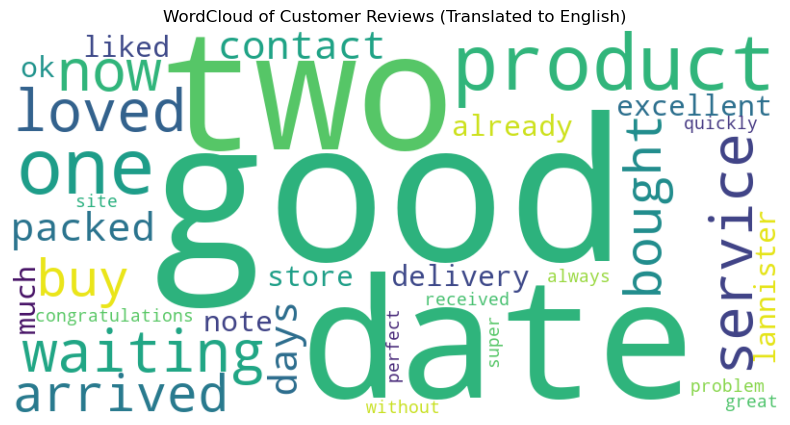

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=100)
X = vectorizer.fit_transform(order["review_comment_message"].dropna())

# Gabungkan kata-kata paling sering muncul
text_reviews = " ".join(vectorizer.get_feature_names_out())

# Terjemahkan teks ke dalam bahasa Inggris
translator = GoogleTranslator(source="auto", target="en")
translated_text = translator.translate(text_reviews)

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis", max_words=200).generate(translated_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Customer Reviews (Translated to English)")
plt.show()

**Insight:**
- Segmentasi Pelanggan RFM menunjukkan bahwa mayoritas pelanggan termasuk dalam kategori Promising dan New Customers, yang berarti banyak pelanggan baru yang berpotensi menjadi pelanggan tetap jika dikelola dengan baik.
- Kategori Champions dan Loyal memiliki jumlah yang sangat kecil, yang menunjukkan bahwa hanya sedikit pelanggan yang benar-benar setia terhadap brand, sehingga strategi loyalitas pelanggan perlu ditingkatkan.
- WordCloud ulasan pelanggan menunjukkan kata-kata dominan seperti "good", "date", "two", "product", dan "service", yang menunjukkan bahwa aspek kualitas produk dan layanan sering disebut dalam ulasan.
- Kata "waiting" dan "arrived" cukup besar, yang bisa mengindikasikan bahwa waktu pengiriman merupakan salah satu faktor yang sering disebutkan dalam ulasan, baik dalam konteks positif maupun negatif.
- Brand "lannister" muncul dalam wordcloud, yang bisa menunjukkan bahwa brand ini sering disebutkan dalam ulasan, baik dalam konteks positif maupun negatif.

## Conclusion

**Aspek Pengiriman**
1. Transaksi padat di daerah Sao Paulo memiliki waktu pengiriman paling lama, disusul dengan daerah-daerah di sekitarnya.
2. Dari sebagian besar pesanan, mayoritas selesai dikirimkan secara tepat waktu. Hanya 9,2% pesanan yang dikirimkan terlambat.
3. Rata-rata *rating* menunjukkan bahwa semakin tinggi durasi pengiriman diikuti oleh lama pengiriman yang semakin cepat pula.
4. Beberapa penjual memiliki persentase keterlambatan yang cukup tinggi. Empat penjual memiliki persentase keterlambatan lebih dari 20%.
5. Keterlambatan pengiriman memiliki rata-rata rating yang lebih rendah daripada pengiriman tepat waktu.
6. Keterlambatan pengiriman paling banyak terjadi pada pemesanan ketika *weekend*. Meskipun demikian, perbedaannya dengan pemesanan ketika *weekdays* hanya sekitar 1-4%.
7. Ongkos kirim yang tinggi tidak menjamin pengiriman akan sampai tepat waktu. Pembelian dengan ongkos kirim rendah justru lebih sedikit mengalami keterlambatan.

**Aspek Produk dan Penjualan**
1. Produk dengan penjualan tertinggi adalah *cama, mesa e banho* (produk terkait tempat tidur, meja, dan kamar mandi), sedangkan produk dengan penjualan terendah adalah *sequros e servicos* (asuransi dan layanan).
2. Sebagian besar pelanggan membeli produk pada rentang 0-200 RBL.
3. Terdapat penjual dengan jumlah pesanan tertinggi, mencapai hampir 3000 pesanan. Namun, dikarenakan identitas penjual hanya bisa didapatkan nomor id-nya saja, maka tidak dapat diketahui secara langsung siapa penjual tersebut.
4. Pelanggan lebih aktif membeli di E-Commerce pada siang hari hingga malam hari, serta pada *weekdays*.

**Aspek Pelanggan**
1. Pada Oktober 2016 hingga Januari 2017 terdapat tren penurunan rating ulasan pelanggan. Namun, setelahnya terjadi stagnansi rating ulasan pelanggan sehingga tidak terlihat adanya tren naik atau turun. Rata-rata rating yang diberikan adalah sekitar 4,0.
2. Transaksi terjadi paling banyak di daerah Sao Paulo, disusul dengan daerah-daerah di sekitarnya.
3. Sebagian besar pelanggan hanya membeli barang yang sama satu kali. Meskipun demikian, sekitar 10.000 pelanggan melakukan *repeat orders* selama dua kali.
4. Terdapat tren naik jumlah pelanggan E-Commerce. Kedua tren tersebut berlaku untuk pelanggan lama dan pelanggan baru. Meskipun demikian, pelanggan lama berjumlah jauh lebih sedikit dibandingkan pelanggan baru.

**Aspek Pembayaran**
1. Sebagian besar pelanggan melakukan pembayaran dengan *credit card*. Pesanan dengan metode pembayaran voucher memiliki proporsi yang jauh lebih kecil dibanding metode lain dan cenderung memiliki status delivered.
2. Pembayaran dengan *voucher* memiliki kemungkinan pembatalan paling besar, yaitu sebesar 1,75%.
3. Proses pembayaran dengan *credit card* paling cepat dibandingkan dengan metode lainnya. Pembayaran dengan boleto memiliki waktu proses pembayaran paling lama. Di sisi lain, proses pembayaran dengan *voucher* bernilai negatif. Hal ini mengindikasikan bahwa *voucher* diproses atau diverifikasi lebih awal daripada transaksi utama.